# Load required librires such as glmnet for features selection 
# Caret for  data split and cross validation
# pROC for ROC curve plotting


# Native R kernel for Jupyter
https://github.com/IRkernel/IRkernel

In [62]:
getwd()

[1] "/home/fadl2/Ryan/RAW_DATA_BOTH_BATCHS/RAW_DATA/normlized_two_batchs_togther"

In [60]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.3                         
year           2017                        
month          11                          
day            30                          
svn rev        73796                       
language       R                           
version.string R version 3.4.3 (2017-11-30)
nickname       Kite-Eating Tree            

In [12]:
#install.packages("limma")
source("https://bioconductor.org/biocLite.R")
biocLite("limma")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.2 (2017-09-28).
Installing package(s) ‘limma’
Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘limma’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'data.table', 'glue', 'lazyeval', 'lubridate', 'openssl', 'pryr',
  'purrr', 'rlang', 'robustbase', 'tidyr', 'tidyselect', 'tidyverse', 'withr'


In [141]:
library(glmnet)
library(caret)
library(pROC)
library(ggplot2)
library(reshape)
library(data.table)
library(doParallel)
library(doMC)
registerDoMC(50)
library(plyr)
library(dplyr)
library(tibble)
library(tidyr)
library(limma)

In [32]:
save.image(file = "COBRE.RData")

In [190]:
save.image(file = "COBRE2.RData")

In [142]:
load(file = "COBRE.RData")

# Load the metabolomics data: 57 samples(28 obese, 29 normal)   
#  and 230 metabolites: 79 Untargeted and 123 Targeted (11 AA and 140 lipids)


In [2]:
cobre_all_two_chips<-read.csv(file="AA -lipids-untarget-normlized.csv",check.names=T)

train=cobre_all_two_chips

x <- data.matrix(train[,10:ncol(train)]) # metabolites
y <- as.factor(train$Label) # lables


![alt text](Capture.JPG "Title")

In [1]:
levels(train$Label)


[1] "Normal" "Obese"

In [1]:
dim(x)


[1]  57 230

In [5]:
table(y)


y
Normal  Obese 
    29     28 

In [3]:
head(train)
head(x)

X,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,OBS_NORMAL_con,Label,Histidine,⋯,Benzoic.acid,Ribonolactone,Petroselinic.acid,Methylcysteine,Docosahexaenoic.acid,Arachidic.acid,Erythrose,X1.5.Anhydrosorbitol,D.Threitol,X2.Hydroxypyridine
MT12,3,3,17,18,1,0,24.6,Normal,-1.3011724,⋯,0.5211878,-0.7513749,-0.3502074,-0.5159115,0.002746233,-0.3126881,-0.4105212,-0.53898667,0.3663480,-0.7603450
MT13,1,3,28,26,4,2,38.4,Obese,0.1907136,⋯,-0.3998676,-0.9587614,-0.3816547,-0.5623591,0.140648299,-0.7786528,-0.7451340,-0.32066163,0.1046196,-0.7603450
MT15,3,3,30,39,2,1,22.0,Normal,-1.7239222,⋯,0.4391095,-0.1060000,-0.7412140,-2.2879859,0.156911450,-0.4689009,-0.2152600,-0.45383562,-1.5167051,-0.7603450
MT16,3,3,33,32,4,3,30.0,Obese,-0.2660199,⋯,0.2888854,-0.6932603,0.1448129,-0.5623591,0.327260038,0.3899925,-4.3379166,0.08775887,-1.2506828,-0.9777624
MT18,3,3,32,34,3,2,31.5,Obese,-0.9390723,⋯,0.1292880,-1.0619580,-1.3711803,-0.2308972,-2.994121806,-0.5866939,-0.4378166,-0.40044343,0.1046196,-1.4801240
MT19,2,2,36,37,2,1,20.5,Normal,-0.8307209,⋯,-0.3821601,-0.3420400,-1.4460712,-0.3321152,-2.599408650,-0.6534904,-0.1634869,0.12922337,0.2859783,-0.4116233


Histidine,isoleucine,Proline,Tryptophan,N.Acetyl.l.ornithine,Kynurenine,Methionine.sulfoxide,trans.4.Hydroxy.L.proline,Putrescine,Spermidine,⋯,Benzoic.acid,Ribonolactone,Petroselinic.acid,Methylcysteine,Docosahexaenoic.acid,Arachidic.acid,Erythrose,X1.5.Anhydrosorbitol,D.Threitol,X2.Hydroxypyridine
-1.3011724,-0.02780630,-0.2696960,-0.8181390,-1.0592072,-0.78108465,-0.67973122,-1.39760497,-1.3575029,-0.90979357,⋯,0.5211878,-0.7513749,-0.3502074,-0.5159115,0.002746233,-0.3126881,-0.4105212,-0.53898667,0.3663480,-0.7603450
0.1907136,0.45332186,0.5502607,0.6764013,-0.1487981,0.22201921,0.29371186,0.49859661,0.6778919,0.55021821,⋯,-0.3998676,-0.9587614,-0.3816547,-0.5623591,0.140648299,-0.7786528,-0.7451340,-0.32066163,0.1046196,-0.7603450
-1.7239222,-0.02780630,-1.1791738,-1.2023542,-0.8597820,-0.59362928,-0.01924588,0.06898471,-0.5698407,-0.02904329,⋯,0.4391095,-0.1060000,-0.7412140,-2.2879859,0.156911450,-0.4689009,-0.2152600,-0.45383562,-1.5167051,-0.7603450
-0.2660199,-1.91438002,-0.6766311,-0.6006515,-0.1996268,0.04462353,0.23003819,-0.52779471,0.4232686,0.27751604,⋯,0.2888854,-0.6932603,0.1448129,-0.5623591,0.327260038,0.3899925,-4.3379166,0.08775887,-1.2506828,-0.9777624
-0.9390723,0.08817478,-0.2696960,-0.6006515,-0.9779135,-1.77913097,-0.61139366,-1.14610889,-0.2871581,-0.49570413,⋯,0.1292880,-1.0619580,-1.3711803,-0.2308972,-2.994121806,-0.5866939,-0.4378166,-0.40044343,0.1046196,-1.4801240
-0.8307209,0.22800589,-0.8741779,-0.2999539,-0.7583837,-0.72155227,-0.06224986,0.06898471,-0.5698407,-0.02904329,⋯,-0.3821601,-0.3420400,-1.4460712,-0.3321152,-2.599408650,-0.6534904,-0.1634869,0.12922337,0.2859783,-0.4116233


# Can the 230 metabolites predict the Obes-normal status, let's use Caret and glmnet packages to find the accuracy of the model build by only metabloites

In [10]:
metabolites_230=data.frame(x,y)
colnames(metabolites_230)[ncol(metabolites_230)]="lable"

In [34]:
y

[1] Normal Obese  Normal Obese  Obese  Normal Normal Normal Normal Obese 
[11] Obese  Obese  Normal Normal Normal Obese  Obese  Obese  Normal Normal
[21] Obese  Normal Normal Normal Normal Obese  Normal Normal Obese  Normal
[31] Normal Obese  Normal Normal Obese  Obese  Obese  Obese  Obese  Normal
[41] Normal Obese  Obese  Obese  Obese  Obese  Normal Normal Obese  Normal
[51] Normal Obese  Normal Obese  Obese  Obese  Normal
Levels: Normal Obese

# Select alpha of the elastic net
http://ellisp.github.io/blog/2016/08/13/fitbit-lasso

    Question: Can we use CARET to find best alpha and beta
    https://quantmacro.wordpress.com/2016/04/26/fitting-elastic-net-model-in-r/
    https://educationalresearchtechniques.com/2017/04/14/elastic-net-regression-in-r/

In [70]:
#install.packages("dplyr")
#install.packages("magrittr")
#library(dplyr)
#library(magrittr)
#PKG<-"package:magrittr"
#detach(PKG,character.only=TRUE)

`geom_smooth()` using method = 'loess'


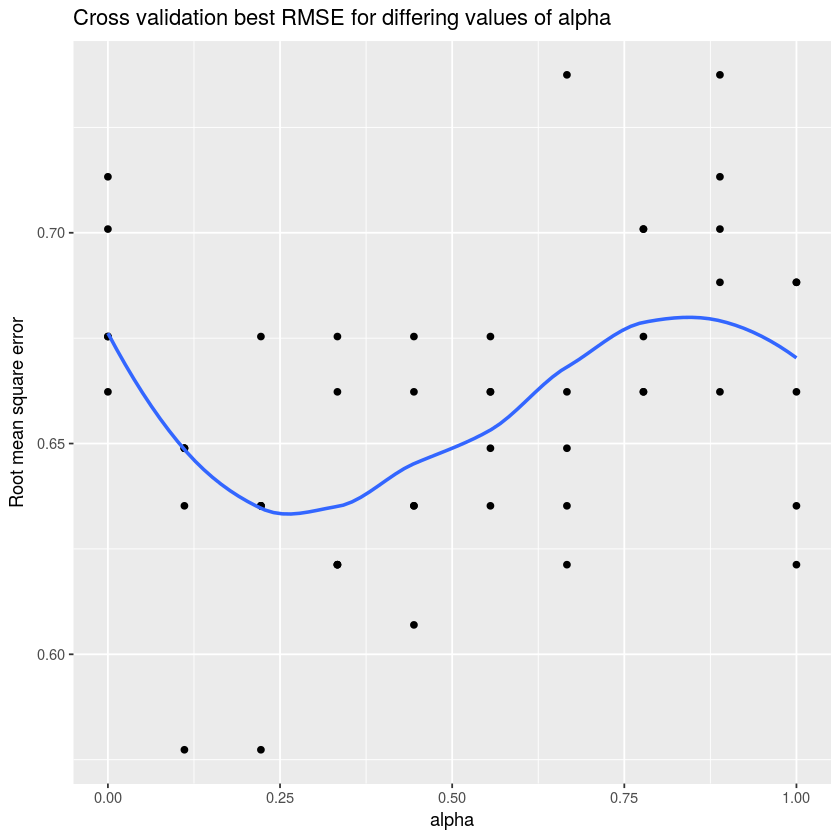

In [9]:
#http://ellisp.github.io/blog/2016/08/13/fitbit-lasso

set.seed(123)
alphas <- seq(from = 0, to  = 1, length.out = 10)
res <- matrix(0, nrow = length(alphas), ncol = 6) # five columns for results - five repeats of each CV run
for(i in 1:length(alphas)){
   for(j in 2:6){
      cvmod <- cv.glmnet(x, y, alpha = alphas[i],family='binomial',nfolds=10, 
                   standardize=TRUE, type.measure='class')
      res[i, c(1, j)] <- c(alphas[i], sqrt(min(cvmod$cvm)))
   }
}
res <- data.frame(res)
res$average_rmse <- apply(res[ , 2:6], 1, mean)
res <- res[order(res$average_rmse), ]
names(res)[1] <- "alpha"

res %>%
   select(-average_rmse) %>%
   gather(trial, rmse, -alpha) %>%
   ggplot(aes(x = alpha, y = rmse)) +
   geom_point() +
   geom_smooth(se = FALSE) +
   labs(y = "Root mean square error") +
   ggtitle("Cross validation best RMSE for differing values of alpha")

# best alpha varies according to the random seed set earlier but with seed 123 it is 0.22
bestalpha <- res[1, 1]

In [96]:
res
bestalpha

,alpha,X2,X3,X4,X5,X6,average_rmse
3,0.2222222,0.5773503,0.6352234,0.6352234,0.6753816,0.6352234,0.6316804
2,0.1111111,0.5773503,0.6488857,0.6488857,0.6488857,0.6352234,0.6318461
4,0.3333333,0.6212607,0.6753816,0.6212607,0.6212607,0.6622662,0.6402860
5,0.4444444,0.6352234,0.6352234,0.6622662,0.6069770,0.6753816,0.6430143
6,0.5555556,0.6352234,0.6753816,0.6622662,0.6622662,0.6488857,0.6568046
10,1.0000000,0.6882472,0.6882472,0.6622662,0.6212607,0.6352234,0.6590489
7,0.6666667,0.6352234,0.7374684,0.6622662,0.6488857,0.6212607,0.6610209
8,0.7777778,0.6622662,0.7008766,0.6753816,0.7008766,0.6622662,0.6803335
1,0.0000000,0.6753816,0.7008766,0.6622662,0.7132825,0.6753816,0.6854377
9,0.8888889,0.6882472,0.7008766,0.6622662,0.7132825,0.7374684,0.7004282


[1] 0.2222222

# what are the best metabolites predict normal obese lables
# We will use glmnet R package to select specific metabolites
# We need to estimate the best lambda for our data using glmnet.cv which produce different lambda. To reduce this variablity as it mentioned in glment manula
From the glmnet reference manual:
"Note also that the results of cv.glmnet are random, since the folds are selected at random. Users can reduce this randomness by running cv.glmnet many times, and averaging the error curves."

# we have to run glmnet.cv 100 times and take the average lambda like in the below link
https://stats.stackexchange.com/questions/97777/variablity-in-cv-glmnet-results

In [11]:
lambdas = NULL
metabolites_list=list()
#metabolites_list
for (j in 1:10)
{
for (i in 1:100)
{
  #fit <- cv.glmnet(x, y, family='binomial',nfolds=10, 
       #            standardize=TRUE, type.measure='class')
    
    #cv.glmnet does NOT search for values for alpha. A specific value should be supplied, else alpha=1 is assumed by default.
    
    fit <- cv.glmnet(x, y, family='binomial',nfolds=10, 
                   standardize=TRUE, type.measure='class',alpha=bestalpha)
    
  errors = data.frame(fit$lambda,fit$cvm)
  lambdas <- rbind(lambdas,errors)
}
# take mean cvm for each lambda
lambdas <- aggregate(lambdas[, 2], list(lambdas$fit.lambda), mean)

# select the best one
bestindex = which(lambdas[2]==min(lambdas[2]))
bestlambda = lambdas[bestindex,1]
#bestlambda
lambdas = NULL
cv.lasso<- glmnet(x, y,lambda=bestlambda,family='binomial',standardize=TRUE)
#coef(cv.lasso, s=bestlambda)
zz=as.matrix(coef(cv.lasso, s=bestlambda)[,1])

zz1=as.matrix(zz[order(abs(zz[,1]),decreasing = T),])

zz2=data.frame(zz1[zz1!=0 & rownames(zz1)!="(Intercept)",1])
colnames(zz2)="coffiecents"

metabolites_list[[j]]=rownames(zz2)
}

In [95]:
metabolites_list

[[1]]
 [1] "PC.ae.C403"                      "X2.Hydroxy.3.methylbutyric.acid"
 [3] "PC.aa.C403"                      "PC.ae.C362"                     
 [5] "PC.ae.C406"                      "Oleic.acid"                     
 [7] "isoleucine"                      "C41"                            
 [9] "L.Arabitol"                      "X1.5.Anhydrosorbitol"           
[11] "C6.C41.DC"                       "Benzoic.acid"                   
[13] "X2.Hydroxybutyric.acid"          "C161.OH"                        
[15] "C5"                              "PC.ae.C343"                     
[17] "PC.aa.C402"                      "Galactonic.acid"                
[19] "PC.ae.C402"                      "C181"                           
[21] "C51.DC"                          "Indoxyl.sulfate"                
[23] "Malic.acid"                      "L.Aspartic.acid"                
[25] "PC.aa.C404"                      "O.Phosphoethanolamine"          
[27] "D.Galactose"                     "Myoinositol"                    
[29] "Glycine"                         "Mannitol"                       
[31] "C3"                              "PC.ae.C340"                     
[33] "PC.aa.C365"                      "Citric.acid"                    
[35] "C5.DC.C6.OH"                     "Caproic.acid"                   
[37] "Arachidic.acid"                  "L.Alpha.aminobutyric.acid"      
[39] "D.Threitol"                     

[[2]]
 [1] "PC.ae.C403"                      "X2.Hydroxy.3.methylbutyric.acid"
 [3] "PC.aa.C403"                      "PC.ae.C362"                     
 [5] "PC.ae.C406"                      "Oleic.acid"                     
 [7] "isoleucine"                      "C41"                            
 [9] "L.Arabitol"                      "X1.5.Anhydrosorbitol"           
[11] "C6.C41.DC"                       "Benzoic.acid"                   
[13] "X2.Hydroxybutyric.acid"          "C161.OH"                        
[15] "C5"                              "PC.ae.C343"                     
[17] "PC.aa.C402"                      "Galactonic.acid"                
[19] "PC.ae.C402"                      "C181"                           
[21] "C51.DC"                          "Indoxyl.sulfate"                
[23] "Malic.acid"                      "L.Aspartic.acid"                
[25] "PC.aa.C404"                      "O.Phosphoethanolamine"          
[27] "D.Galactose"                     "Myoinositol"                    
[29] "Glycine"                         "Mannitol"                       
[31] "C3"                              "PC.ae.C340"                     
[33] "PC.aa.C365"                      "Citric.acid"                    
[35] "C5.DC.C6.OH"                     "Caproic.acid"                   
[37] "Arachidic.acid"                  "L.Alpha.aminobutyric.acid"      
[39] "D.Threitol"                     

[[3]]
 [1] "PC.ae.C403"                      "X2.Hydroxy.3.methylbutyric.acid"
 [3] "PC.aa.C403"                      "PC.ae.C362"                     
 [5] "PC.ae.C406"                      "Oleic.acid"                     
 [7] "isoleucine"                      "C41"                            
 [9] "L.Arabitol"                      "X1.5.Anhydrosorbitol"           
[11] "C6.C41.DC"                       "Benzoic.acid"                   
[13] "X2.Hydroxybutyric.acid"          "C161.OH"                        
[15] "C5"                              "PC.ae.C343"                     
[17] "PC.aa.C402"                      "Galactonic.acid"                
[19] "PC.ae.C402"                      "C181"                           
[21] "C51.DC"                          "Indoxyl.sulfate"                
[23] "Malic.acid"                      "L.Aspartic.acid"                
[25] "PC.aa.C404"                      "O.Phosphoethanolamine"          
[27] "D.Galactose"                     "Myoinositol"                    
[29] "Glycine"                         "Mannitol"                       
[31] "C3"                        

In [49]:
bestlambda
log(bestlambda)

[1] 0.008621732

[1] -4.753469

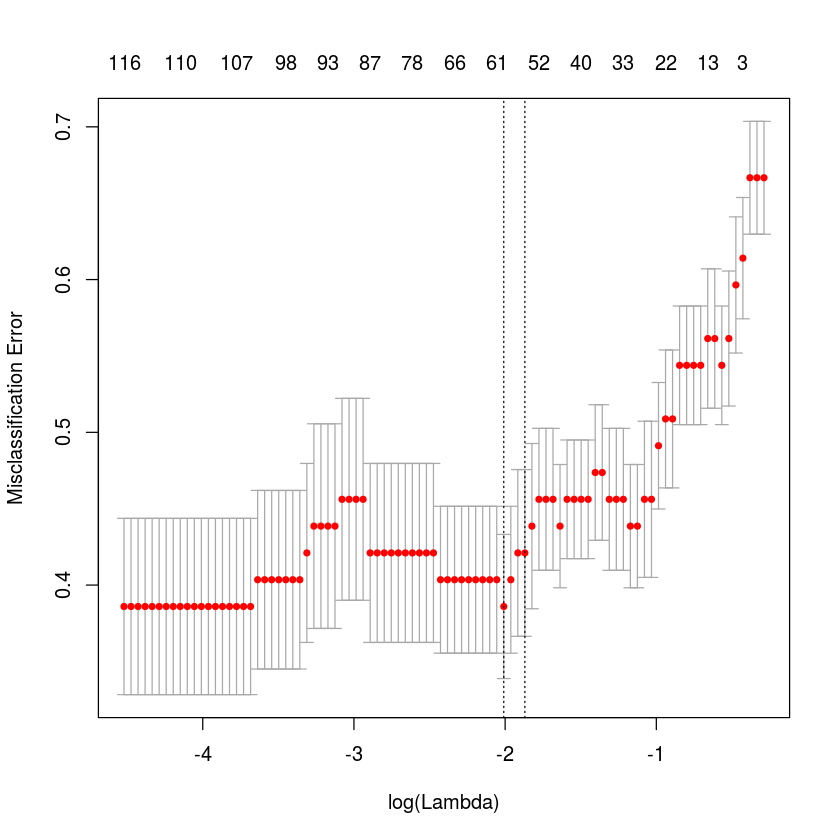

In [46]:
#https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html
plot(fit)

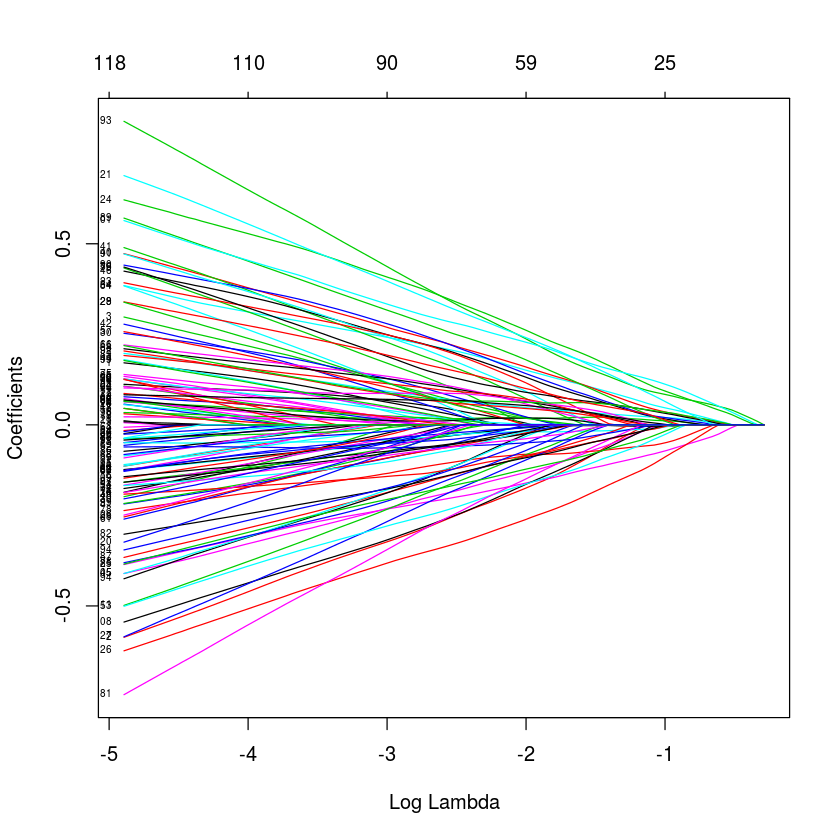

In [47]:
#https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html
plot(fit$glmnet.fit, xvar="lambda", label=TRUE)

In [50]:
#saveRDS(metabolites_list, "metabolites_list.rds")
 metabolites_list <- readRDS("metabolites_list.rds")
#write.csv(metabolites_list_consensus,"metabolites_list.csv")

In [51]:
metabolites_list_consensus=Reduce(intersect,metabolites_list) 

## After waiting this long time, we end up with 20 stable metabloites

'PC.ae.C403' 'X2.Hydroxy.3.methylbutyric.acid' 'PC.aa.C403' 'PC.ae.C362' 'PC.ae.C406' 'Oleic.acid' 'isoleucine' 'C41' 'L.Arabitol' 'X1.5.Anhydrosorbitol' 'C6.C41.DC' 'Benzoic.acid' 'X2.Hydroxybutyric.acid' 'C161.OH' 'C5' 'PC.ae.C343' 'PC.aa.C402' 'Galactonic.acid' 'PC.ae.C402' 'C181' 'C51.DC' 'Indoxyl.sulfate' 'Malic.acid' 'L.Aspartic.acid' 'O.Phosphoethanolamine' 'D.Galactose' 'Myoinositol' 'C3' 'PC.ae.C340' 'PC.aa.C365' 'Citric.acid'


In [52]:
metabolites_list_consensus=make.names(metabolites_list_consensus, unique=TRUE)
metabolites_list_consensus
length(metabolites_list_consensus)

[1] "PC.ae.C403"                      "X2.Hydroxy.3.methylbutyric.acid"
 [3] "PC.aa.C403"                      "PC.ae.C362"                     
 [5] "PC.ae.C406"                      "Oleic.acid"                     
 [7] "isoleucine"                      "C41"                            
 [9] "L.Arabitol"                      "X1.5.Anhydrosorbitol"           
[11] "C6.C41.DC"                       "Benzoic.acid"                   
[13] "X2.Hydroxybutyric.acid"          "C161.OH"                        
[15] "C5"                              "PC.ae.C343"                     
[17] "PC.aa.C402"                      "Galactonic.acid"                
[19] "PC.ae.C402"                      "C181"                           
[21] "C51.DC"                          "Indoxyl.sulfate"                
[23] "Malic.acid"                      "L.Aspartic.acid"                
[25] "O.Phosphoethanolamine"           "D.Galactose"                    
[27] "Myoinositol"                     "C3"                             
[29] "PC.ae.C340"                      "PC.aa.C365"                     
[31] "Citric.acid"

[1] 31

In [53]:
metabolites_lasso=data.frame(train[,metabolites_list_consensus],train$Label)
colnames(metabolites_lasso)[ncol(metabolites_lasso)]="lable"
dim(metabolites_lasso)
head(metabolites_lasso)
metabolites_lasso$lable


[1] 57 32

PC.ae.C403,X2.Hydroxy.3.methylbutyric.acid,PC.aa.C403,PC.ae.C362,PC.ae.C406,Oleic.acid,isoleucine,C41,L.Arabitol,X1.5.Anhydrosorbitol,⋯,Malic.acid,L.Aspartic.acid,O.Phosphoethanolamine,D.Galactose,Myoinositol,C3,PC.ae.C340,PC.aa.C365,Citric.acid,lable
0.05349772,-0.4302330,-0.6434805,0.6510388,0.25655534,0.7739684,-0.02780630,-1.7447970,0.49224325,-0.53898667,⋯,0.1261801,-1.8515849,-0.32064307,-0.1578991,-0.6710888,-1.45057288,-0.01419766,-0.8173285,-0.1303262,Normal
1.47373730,-0.9978383,1.4417915,2.2692627,1.16722991,0.5203891,0.45332186,-0.4946831,-0.43914482,-0.32066163,⋯,0.3311736,-0.1359379,0.35394160,0.0814348,0.5570171,0.89109075,1.14099252,1.2439001,0.6844715,Obese
-0.77032471,-1.0943611,-0.7314518,-0.3517679,0.03943334,-0.2068387,-0.02780630,0.1032041,-0.85531464,-0.45383562,⋯,0.4494793,0.3998732,0.07045631,0.2203725,-0.8921536,-0.07215215,-0.95214772,1.6397315,0.6844715,Normal
-0.77032471,0.3278343,-1.1936063,-0.8922831,-0.52095862,-1.3558672,-1.91438002,0.4578568,-0.07590145,0.08775887,⋯,-0.6943037,0.5491654,-0.10272956,0.0814348,0.5570171,0.18755072,-1.44362010,-0.6847218,-0.4225555,Obese
0.12852084,-0.8943155,0.1502408,0.3174063,0.03943334,-1.1256036,0.08817478,0.1823098,-0.43914482,-0.40044343,⋯,-0.3436057,-0.4236931,-0.12026620,-0.3109337,-0.5294478,0.28085458,-0.12509074,-0.1854042,0.6844715,Obese
-0.25981731,-0.7581060,-0.2248205,0.7702473,0.18073702,-1.2254883,0.22800589,0.2479808,0.16717441,0.12922337,⋯,0.2367472,-0.5116675,-0.12026620,0.0814348,-0.8921536,0.04730251,0.24348426,2.5312915,0.6844715,Normal


[1] Normal Obese  Normal Obese  Obese  Normal Normal Normal Normal Obese 
[11] Obese  Obese  Normal Normal Normal Obese  Obese  Obese  Normal Normal
[21] Obese  Normal Normal Normal Normal Obese  Normal Normal Obese  Normal
[31] Normal Obese  Normal Normal Obese  Obese  Obese  Obese  Obese  Normal
[41] Normal Obese  Obese  Obese  Obese  Obese  Normal Normal Obese  Normal
[51] Normal Obese  Normal Obese  Obese  Obese  Normal
Levels: Normal Obese

In [197]:
#solve the problem of metabolites names
#write.csv(metabolites_lasso,"metabolites_lasso_list_final.csv")
metabolites_lasso=read.csv(file="metabolites_lasso_list_final1.csv",check.names=F)
head(metabolites_lasso)
dim(metabolites_lasso)

PC ae C40:3,2-Hydroxy-3-methylbutyric acid,PC aa C40:3,PC ae C36:2,PC ae C40:6,Oleic acid,isoleucine,O-butanoyl-carnitine,L-Arabitol,"1,5-Anhydrosorbitol",⋯,Glutaconylcarnitine,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid,lable
0.05349772,-0.4302330,-0.6434805,0.6510388,0.25655534,0.7739684,-0.02780630,-1.7447970,0.49224325,-0.53898667,⋯,-0.4119751,-3.43505707,0.1261801,-1.8515849,-0.6710888,-1.45057288,-0.01419766,-0.8173285,-0.1303262,Normal
1.47373730,-0.9978383,1.4417915,2.2692627,1.16722991,0.5203891,0.45332186,-0.4946831,-0.43914482,-0.32066163,⋯,1.1465219,-2.49587547,0.3311736,-0.1359379,0.5570171,0.89109075,1.14099252,1.2439001,0.6844715,Obese
-0.77032471,-1.0943611,-0.7314518,-0.3517679,0.03943334,-0.2068387,-0.02780630,0.1032041,-0.85531464,-0.45383562,⋯,0.4641664,-0.17003062,0.4494793,0.3998732,-0.8921536,-0.07215215,-0.95214772,1.6397315,0.6844715,Normal
-0.77032471,0.3278343,-1.1936063,-0.8922831,-0.52095862,-1.3558672,-1.91438002,0.4578568,-0.07590145,0.08775887,⋯,0.9626040,0.18227157,-0.6943037,0.5491654,0.5570171,0.18755072,-1.44362010,-0.6847218,-0.4225555,Obese
0.12852084,-0.8943155,0.1502408,0.3174063,0.03943334,-1.1256036,0.08817478,0.1823098,-0.43914482,-0.40044343,⋯,0.1029355,-3.20485776,-0.3436057,-0.4236931,-0.5294478,0.28085458,-0.12509074,-0.1854042,0.6844715,Obese
-0.25981731,-0.7581060,-0.2248205,0.7702473,0.18073702,-1.2254883,0.22800589,0.2479808,0.16717441,0.12922337,⋯,-1.4698168,0.08604983,0.2367472,-0.5116675,-0.8921536,0.04730251,0.24348426,2.5312915,0.6844715,Normal


[1] 57 30

In [198]:
#require(reshape)
ss5=melt(metabolites_lasso)
head(ss5)

Using lable as id variables


lable,variable,value
Normal,PC ae C40:3,0.05349772
Obese,PC ae C40:3,1.47373730
Normal,PC ae C40:3,-0.77032471
Obese,PC ae C40:3,-0.77032471
Obese,PC ae C40:3,0.12852084
Normal,PC ae C40:3,-0.25981731


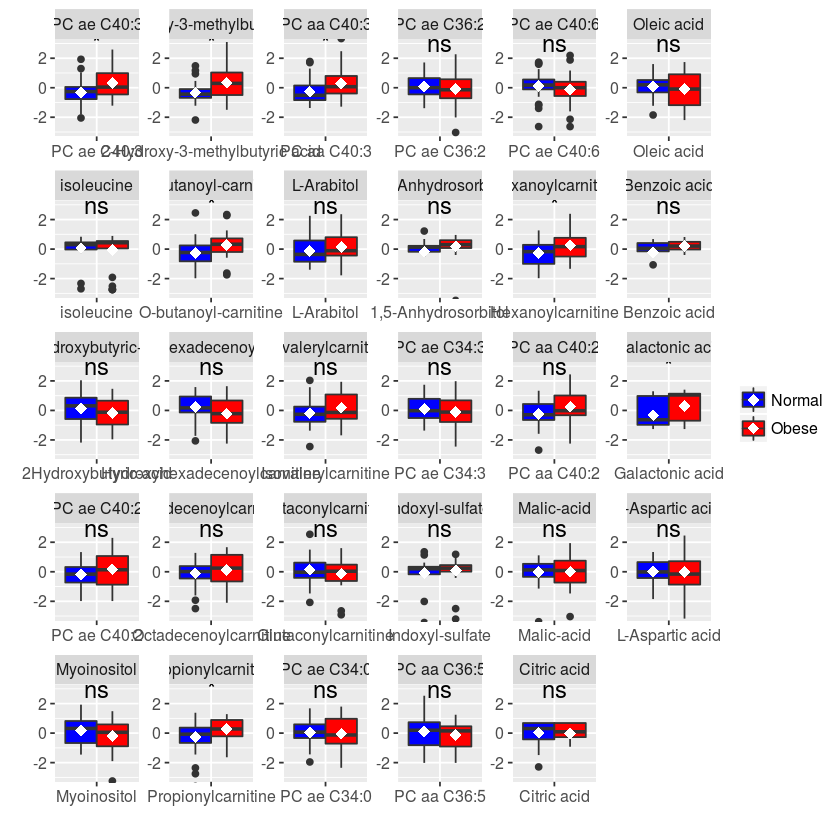

In [103]:
# add p_values
#library("ggpubr")

#pdf("Elasticnet_metabolites_boxplot_sig.pdf",width = 20,height = 20)
p <- ggplot(data =ss5, aes(x=variable, y=value,fill=lable)) + 
  geom_boxplot()+scale_fill_manual(values=c("blue", "red"))+coord_cartesian(ylim = c(-3, 3))+
         stat_summary(fun.y="mean", color="white", geom="point",shape=18, size=3,position=position_dodge(width=0.75))+
  theme(text = element_text(size=12),
        axis.text.x = element_text(angle=0),legend.title=element_blank())+
stat_compare_means(label="p.signif",method = "t.test",label.x = 1, label.y = 3,size = 5)
 p+ facet_wrap( ~ variable, scales="free")+xlab("")+ylab("")

#dev.off()


# We need to know which covariates represent the souce of variablity in the metabolomics data

# We need to look at  Parity, Gravidity, Maternal and Paternal age

![alt text](sov.png "Title")

In [199]:
covariants=data.frame(train[,c("Parity","Gravidity","Pat_Ethnicity", "Mat_Ethnicity","Maternal_Age","Label")])
colnames(covariants)=c("Parity","Gravidity","Paternal_Ethnicity", "Maternal_Ethnicity","Maternal_Age","lable")
dim(covariants)
head(covariants)
covariants$lable

[1] 57  6

Parity,Gravidity,Paternal_Ethnicity,Maternal_Ethnicity,Maternal_Age,lable
0,1,3,3,17,Normal
2,4,3,1,28,Obese
1,2,3,3,30,Normal
3,4,3,3,33,Obese
2,3,3,3,32,Obese
1,2,2,2,36,Normal


[1] Normal Obese  Normal Obese  Obese  Normal Normal Normal Normal Obese 
[11] Obese  Obese  Normal Normal Normal Obese  Obese  Obese  Normal Normal
[21] Obese  Normal Normal Normal Normal Obese  Normal Normal Obese  Normal
[31] Normal Obese  Normal Normal Obese  Obese  Obese  Obese  Obese  Normal
[41] Normal Obese  Obese  Obese  Obese  Obese  Normal Normal Obese  Normal
[51] Normal Obese  Normal Obese  Obese  Obese  Normal
Levels: Normal Obese

In [124]:
covariants$Parity=as.factor(covariants$Parity)
covariants$Gravidity=as.factor(covariants$Gravidity)
covariants$Gravidity=as.factor(covariants$Maternal_Ethnicity)
covariants$Gravidity=as.factor(covariants$Paternal_Ethnicity)

table(covariants$Parity)
table(covariants$Gravidity)
table(covariants$Paternal_Ethnicity)
table(covariants$Maternal_Ethnicity)


 0  1  2  3  4  6 
 7 23 17  4  5  1 


 1  2  3 
11 23 23 


 1  2  3 
11 23 23 


 1  2  3 
10 23 24 

In [132]:
length(which(as.numeric(covariants$Parity) < 3))
covariants[which(as.numeric(covariants$Parity) < 3),1]=1
covariants[which(as.numeric(covariants$Parity) >= 3),1]=2

covariants[which(as.numeric(covariants$Gravidity) <=4),2]=1
covariants[which(as.numeric(covariants$Gravidity) >= 5),2]=2

covariants[which(as.numeric(covariants$Maternal_Ethnicity) <= 2),4]=1
covariants[which(as.numeric(covariants$Maternal_Ethnicity) > 2),4]=2

covariants[which(as.numeric(covariants$Paternal_Ethnicity) <= 2),3]=1
covariants[which(as.numeric(covariants$Paternal_Ethnicity) > 2),3]=2

head(covariants)
covariants$Parity=as.factor(covariants$Parity)
covariants$Gravidity=as.factor(covariants$Gravidity)
covariants$Gravidity=as.factor(covariants$Maternal_Ethnicity)
covariants$Gravidity=as.factor(covariants$Paternal_Ethnicity)

[1] 30

Parity,Gravidity,Paternal_Ethnicity,Maternal_Ethnicity,Maternal_Age,lable
1,1,2,2,17,Normal
2,1,2,1,28,Obese
1,1,2,2,30,Normal
2,1,2,2,33,Obese
2,1,2,2,32,Obese
1,1,1,1,36,Normal


In [133]:
table(covariants$Parity)
table(covariants$Gravidity)
table(covariants$Paternal_Ethnicity)
table(covariants$Maternal_Ethnicity)


 0  1  2  3  4  6 
 0 30 27  0  0  0 


 1  2 
34 23 


 1  2 
34 23 


 1  2 
33 24 

In [122]:
head(covariants)

Parity,Gravidity,Paternal_Ethnicity,Maternal_Ethnicity,Maternal_Age,label
0,3,3,3,17,Normal
2,3,3,1,28,Obese
1,3,3,3,30,Normal
3,3,3,3,33,Obese
2,3,3,3,32,Obese
1,2,2,2,36,Normal


In [117]:
class(covariants$Parity)

[1] "factor"

# Last thing, do you think model accurcy will increase if we combine the 29 metabolites and the covariants.
# Let's see

In [79]:
head(metabolites_lasso)

PC ae C40:3,2-Hydroxy-3-methylbutyric acid,PC aa C40:3,PC ae C36:2,PC ae C40:6,Oleic acid,isoleucine,O-butanoyl-carnitine,L-Arabitol,"1,5-Anhydrosorbitol",⋯,Glutaconylcarnitine,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid,lable
0.05349772,-0.4302330,-0.6434805,0.6510388,0.25655534,0.7739684,-0.02780630,-1.7447970,0.49224325,-0.53898667,⋯,-0.4119751,-3.43505707,0.1261801,-1.8515849,-0.6710888,-1.45057288,-0.01419766,-0.8173285,-0.1303262,Normal
1.47373730,-0.9978383,1.4417915,2.2692627,1.16722991,0.5203891,0.45332186,-0.4946831,-0.43914482,-0.32066163,⋯,1.1465219,-2.49587547,0.3311736,-0.1359379,0.5570171,0.89109075,1.14099252,1.2439001,0.6844715,Obese
-0.77032471,-1.0943611,-0.7314518,-0.3517679,0.03943334,-0.2068387,-0.02780630,0.1032041,-0.85531464,-0.45383562,⋯,0.4641664,-0.17003062,0.4494793,0.3998732,-0.8921536,-0.07215215,-0.95214772,1.6397315,0.6844715,Normal
-0.77032471,0.3278343,-1.1936063,-0.8922831,-0.52095862,-1.3558672,-1.91438002,0.4578568,-0.07590145,0.08775887,⋯,0.9626040,0.18227157,-0.6943037,0.5491654,0.5570171,0.18755072,-1.44362010,-0.6847218,-0.4225555,Obese
0.12852084,-0.8943155,0.1502408,0.3174063,0.03943334,-1.1256036,0.08817478,0.1823098,-0.43914482,-0.40044343,⋯,0.1029355,-3.20485776,-0.3436057,-0.4236931,-0.5294478,0.28085458,-0.12509074,-0.1854042,0.6844715,Obese
-0.25981731,-0.7581060,-0.2248205,0.7702473,0.18073702,-1.2254883,0.22800589,0.2479808,0.16717441,0.12922337,⋯,-1.4698168,0.08604983,0.2367472,-0.5116675,-0.8921536,0.04730251,0.24348426,2.5312915,0.6844715,Normal


In [134]:
lasso_metabolites_and_covariants=data.frame(metabolites_lasso[,-ncol(metabolites_lasso)],covariants,check.names = F)
head(lasso_metabolites_and_covariants)
dim(lasso_metabolites_and_covariants)

PC ae C40:3,2-Hydroxy-3-methylbutyric acid,PC aa C40:3,PC ae C36:2,PC ae C40:6,Oleic acid,isoleucine,O-butanoyl-carnitine,L-Arabitol,"1,5-Anhydrosorbitol",⋯,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid,Parity,Gravidity,Paternal_Ethnicity,Maternal_Ethnicity,Maternal_Age,lable
0.05349772,-0.4302330,-0.6434805,0.6510388,0.25655534,0.7739684,-0.02780630,-1.7447970,0.49224325,-0.53898667,⋯,-1.45057288,-0.01419766,-0.8173285,-0.1303262,1,2,2,2,17,Normal
1.47373730,-0.9978383,1.4417915,2.2692627,1.16722991,0.5203891,0.45332186,-0.4946831,-0.43914482,-0.32066163,⋯,0.89109075,1.14099252,1.2439001,0.6844715,2,2,2,1,28,Obese
-0.77032471,-1.0943611,-0.7314518,-0.3517679,0.03943334,-0.2068387,-0.02780630,0.1032041,-0.85531464,-0.45383562,⋯,-0.07215215,-0.95214772,1.6397315,0.6844715,1,2,2,2,30,Normal
-0.77032471,0.3278343,-1.1936063,-0.8922831,-0.52095862,-1.3558672,-1.91438002,0.4578568,-0.07590145,0.08775887,⋯,0.18755072,-1.44362010,-0.6847218,-0.4225555,2,2,2,2,33,Obese
0.12852084,-0.8943155,0.1502408,0.3174063,0.03943334,-1.1256036,0.08817478,0.1823098,-0.43914482,-0.40044343,⋯,0.28085458,-0.12509074,-0.1854042,0.6844715,2,2,2,2,32,Obese
-0.25981731,-0.7581060,-0.2248205,0.7702473,0.18073702,-1.2254883,0.22800589,0.2479808,0.16717441,0.12922337,⋯,0.04730251,0.24348426,2.5312915,0.6844715,1,1,1,1,36,Normal


[1] 57 35

In [81]:
class(lasso_metabolites_and_covariants$Parity)

[1] "factor"

In [82]:
source('find_roc_range.r')

In [83]:
dim(metabolites_230)
dim(metabolites_lasso)
dim(covariants)
dim(lasso_metabolites_and_covariants)

[1]  57 231

[1] 57 30

[1] 57  6

[1] 57 35

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”

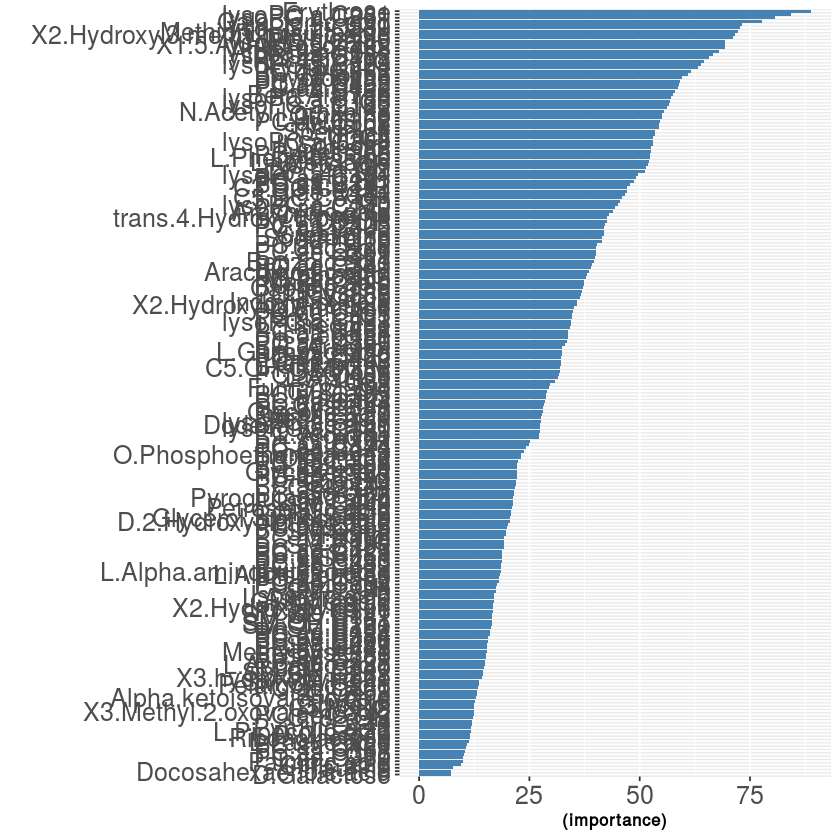

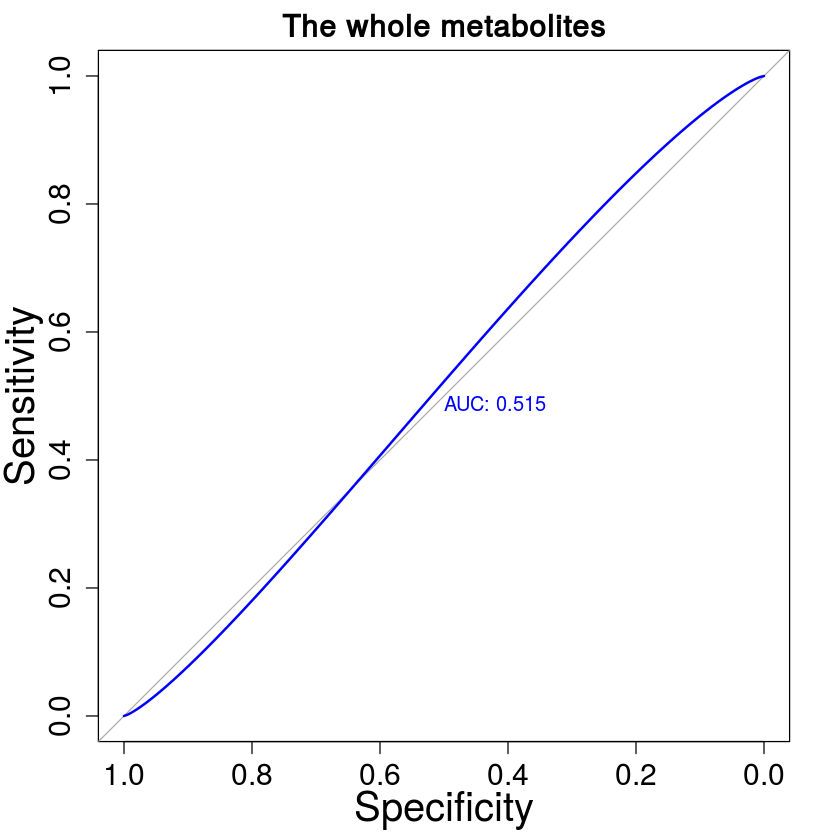

In [107]:
#data,number of folds,seed 
seed=1024
numberoffolds=5
source('find_roc_range.r')
find_roc_range(metabolites_230,numberoffolds,seed,"The whole metabolites")

In [195]:
head(metabolites_lasso)

PC ae C40:3,2-Hydroxy-3-methylbutyric acid,PC aa C40:3,PC ae C36:2,PC ae C40:6,Oleic acid,isoleucine,O-butanoyl-carnitine,L-Arabitol,"1,5-Anhydrosorbitol",⋯,Glutaconylcarnitine,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid,lable
0.05349772,-0.4302330,-0.6434805,0.6510388,0.25655534,0.7739684,-0.02780630,-1.7447970,0.49224325,-0.53898667,⋯,-0.4119751,-3.43505707,0.1261801,-1.8515849,-0.6710888,-1.45057288,-0.01419766,-0.8173285,-0.1303262,Normal
1.47373730,-0.9978383,1.4417915,2.2692627,1.16722991,0.5203891,0.45332186,-0.4946831,-0.43914482,-0.32066163,⋯,1.1465219,-2.49587547,0.3311736,-0.1359379,0.5570171,0.89109075,1.14099252,1.2439001,0.6844715,Obese
-0.77032471,-1.0943611,-0.7314518,-0.3517679,0.03943334,-0.2068387,-0.02780630,0.1032041,-0.85531464,-0.45383562,⋯,0.4641664,-0.17003062,0.4494793,0.3998732,-0.8921536,-0.07215215,-0.95214772,1.6397315,0.6844715,Normal
-0.77032471,0.3278343,-1.1936063,-0.8922831,-0.52095862,-1.3558672,-1.91438002,0.4578568,-0.07590145,0.08775887,⋯,0.9626040,0.18227157,-0.6943037,0.5491654,0.5570171,0.18755072,-1.44362010,-0.6847218,-0.4225555,Obese
0.12852084,-0.8943155,0.1502408,0.3174063,0.03943334,-1.1256036,0.08817478,0.1823098,-0.43914482,-0.40044343,⋯,0.1029355,-3.20485776,-0.3436057,-0.4236931,-0.5294478,0.28085458,-0.12509074,-0.1854042,0.6844715,Obese
-0.25981731,-0.7581060,-0.2248205,0.7702473,0.18073702,-1.2254883,0.22800589,0.2479808,0.16717441,0.12922337,⋯,-1.4698168,0.08604983,0.2367472,-0.5116675,-0.8921536,0.04730251,0.24348426,2.5312915,0.6844715,Normal


In [200]:
source('find_roc_range.r')
find_roc_range(metabolites_lasso,numberoffolds,seed,"Metabolites selected by elastic net")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [201]:
dim(covariants)

[1] 57  6

In [202]:
source('find_roc_range.r')
find_roc_range(covariants,numberoffolds,seed,"Clinical covariates")

ERROR: Error in na.fail.default(structure(list(lable = structure(c(1L, 2L, 1L, : missing values in object


In [137]:
source('find_roc_range.r')

#debugonce(find_roc_range)
#setBreakpoint("find_roc_range.R#38", envir = find_roc_range)

find_roc_range(lasso_metabolites_and_covariants,numberoffolds,seed,"Clinical covariates + metabolites selected by elastic net")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [ ]:
find_roc_range=function(data,k,seed,data_name){
set.seed(seed)
#data.names.list=c('Metabolomics 230','Metabolimcs_elastic_net','Covariates','Covariates and Metabolimcs_elastic_net')
#data.names.list_id=0
splits <- createFolds(y, returnTrain = TRUE,k = k)
results <- lapply(splits, 
                  function(x, dat) {
                    holdout <- (1:nrow(dat))[-unique(x)]
                    data.frame(index = holdout, 
                               obs = dat$lable[holdout])
                  },
                  dat = data)
mods <- vector(mode = "list", length = length(splits))
roc <- vector(mode = "list", length = length(splits))
## foreach or lapply would do this faster
for(i in seq(along = splits)) {
  in_train <- unique(splits[[i]])
  set.seed(seed)
  mod <- train(lable ~ ., data = data[in_train, ],
               method = "regLogistic", #cost (Cost) loss (Loss Function)  epsilon (Tolerance)
               preProc = c("center", "scale"),trControl=trainControl(method="LOOCV", 
                     summaryFunction=twoClassSummary, 
                     classProbs=T,
                     savePredictions = T,allowParallel = TRUE)
               )
  results[[i]]$pred <- predict(mod, data[-in_train,!(colnames(data) %in% c('lable')) ],type="prob")
  roc[[i]]<- roc(predictor=results[[i]]$pred$Normal,response=data[-in_train,'lable' ],levels=rev(levels(data[-in_train,'lable' ])),smooth=TRUE)
  mods[[i]] <- mod
  
}

###############How to plot concatante variables importance from 5 models
important_featurs=(lapply(mods,function(xx) (varImp(xx,scale=T))))
important_featurs_list=(lapply(important_featurs,function(x) data.frame(x$importance)))
important_featurs_list2=data.frame((lapply(important_featurs_list,function(x) (x[1]))))
important_featurs2=data.frame(apply(important_featurs_list2,1,mean ))
colnames(important_featurs2)='importance'
zz=important_featurs2[order(-important_featurs2$importance),,drop=F]
zz=(zz[apply(zz, 1, function(row) all(row !=0 )),,drop=F])
zz=(zz[apply(zz, 1, function(row) all(row >5 )),,drop=F])

p=ggplot(data=zz,aes(x=reorder(rownames(zz),importance), y=(importance))) +
geom_bar(stat="identity",fill="steelblue")+
xlab("Variables")+theme(axis.text=element_text(size=5),axis.title=element_text(size=10,face="bold"))
p1=p+coord_flip()
print(p1)



predicted_57=(rbindlist(lapply(results,function(x) data.frame(index=x$index,obs=x$obs,pre=x$pred))))
plot(roc(predictor=predicted_57$pre.Normal,response=predicted_57$obs,
levels=rev(levels(predicted_57$obs)),smooth=TRUE),print.auc = TRUE,main = paste0(data_name),col='blue')
#print(predicted_57)  
#print(results)
#print(roc)
lapply(roc, function(x)plot(x,print.auc = TRUE))
#cat(sprintf("The average AUC of %d fold changes is %f ", k, mean(as.numeric(lapply(roc,function(x) (x$auc))))))
clab = 0.1
cmain = 0.1
caxis = 0.1
lapply(mods,function(x) plot(varImp(x,scale=T),20,cex.lab=clab,cex.main =cmain,cex.axis=caxis))
#lapply(mods,function(x) plot(x))	
    }
   

In [232]:
#############################Tabel1 demographical characteristics 
cobre_all<-cobre_all_two_chips
head(cobre_all)
table(cobre_all$Label)
#########Maternal age t test
mean(as.matrix(cobre_all[which(cobre_all$Label=="Normal"),][4]))
sd(as.matrix(cobre_all[which(cobre_all$Label=="Normal"),][4]))
mean(as.matrix(cobre_all[which(cobre_all$Label=="Obese"),][4]))
sd(as.matrix(cobre_all[which(cobre_all$Label=="Obese"),][4]))
t.test(as.matrix(cobre_all[which(cobre_all$Label=="Normal"),][4]),as.matrix(cobre_all[which(cobre_all$Label=="Obese"),][4]))
#########Paternal age t test
mean(as.matrix(cobre_all[which(cobre_all$Label=="Normal"),][5]))
sd(as.matrix(cobre_all[which(cobre_all$Label=="Normal"),][5]))
mean(as.matrix(cobre_all[which(cobre_all$Label=="Obese"),][5]))
sd(as.matrix(cobre_all[which(cobre_all$Label=="Obese"),][5]))
t.test(as.matrix(cobre_all[which(cobre_all$Label=="Normal"),][5]),as.matrix(cobre_all[which(cobre_all$Label=="Obese"),][5]))
#########BMI
mean(as.matrix(cobre_all[which(cobre_all$Label=="Normal"),][8]))
sd(as.matrix(cobre_all[which(cobre_all$Label=="Normal"),][8]))
mean(as.matrix(cobre_all[which(cobre_all$Label=="Obese"),][8]))
sd(as.matrix(cobre_all[which(cobre_all$Label=="Obese"),][8]))
t.test(as.matrix(cobre_all[which(cobre_all$Label=="Normal"),][8]),as.matrix(cobre_all[which(cobre_all$Label=="Obese"),][8]))

#### parity chisq test

table((cobre_all[which(cobre_all$Label=="Normal"),][7]))
table((cobre_all[which(cobre_all$Label=="Obese"),][7]))

trial <- matrix(c(5,16,7,1,0,0,2,7,10,3,5,1), ncol=2,nrow = 6)
colnames(trial) <- c('normal', 'case')
rownames(trial) <- c('0', '1','2','3','4','6')
trial.table <- as.table(trial)

chisq.test(trial.table)

#### Gravidity chisq test
table((cobre_all[which(cobre_all$Label=="Normal"),][6]))
table((cobre_all[which(cobre_all$Label=="Obese"),][6]))

trial <- matrix(c(5,12,7,4,0,1,0,0,0,1,5,8,5,1,3,3,1,1), ncol=2,nrow = 9)
colnames(trial) <- c('normal', 'case')
rownames(trial) <- c('1','2','3','4','5','6','7','10','13')
trial.table <- as.table(trial)

chisq.test(trial.table)

#### Materinal ethnicity chisq test

table((cobre_all[which(cobre_all$Label=="Normal"),][2]))
table((cobre_all[which(cobre_all$Label=="Obese"),][2]))

trial <- matrix(c(6,16,7,4,7,17), ncol=2,nrow = 3)
colnames(trial) <- c('normal', 'case')
rownames(trial) <- c('1','2','3')
trial.table <- as.table(trial)

chisq.test(trial.table)

#### Paternal ethnicity chisq test
table((cobre_all[which(cobre_all$Label=="Normal"),][3]))
table((cobre_all[which(cobre_all$Label=="Obese"),][3]))

trial <- matrix(c(8,14,7,3,9,16), ncol=2,nrow = 3)
colnames(trial) <- c('normal', 'case')
rownames(trial) <- c('1','2','3')
trial.table <- as.table(trial)

chisq.test(trial.table)

X,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,OBS_NORMAL_con,Label,Histidine,⋯,Benzoic.acid,Ribonolactone,Petroselinic.acid,Methylcysteine,Docosahexaenoic.acid,Arachidic.acid,Erythrose,X1.5.Anhydrosorbitol,D.Threitol,X2.Hydroxypyridine
MT12,3,3,17,18,1,0,24.6,Normal,-1.3011724,⋯,0.5211878,-0.7513749,-0.3502074,-0.5159115,0.002746233,-0.3126881,-0.4105212,-0.53898667,0.3663480,-0.7603450
MT13,1,3,28,26,4,2,38.4,Obese,0.1907136,⋯,-0.3998676,-0.9587614,-0.3816547,-0.5623591,0.140648299,-0.7786528,-0.7451340,-0.32066163,0.1046196,-0.7603450
MT15,3,3,30,39,2,1,22.0,Normal,-1.7239222,⋯,0.4391095,-0.1060000,-0.7412140,-2.2879859,0.156911450,-0.4689009,-0.2152600,-0.45383562,-1.5167051,-0.7603450
MT16,3,3,33,32,4,3,30.0,Obese,-0.2660199,⋯,0.2888854,-0.6932603,0.1448129,-0.5623591,0.327260038,0.3899925,-4.3379166,0.08775887,-1.2506828,-0.9777624
MT18,3,3,32,34,3,2,31.5,Obese,-0.9390723,⋯,0.1292880,-1.0619580,-1.3711803,-0.2308972,-2.994121806,-0.5866939,-0.4378166,-0.40044343,0.1046196,-1.4801240
MT19,2,2,36,37,2,1,20.5,Normal,-0.8307209,⋯,-0.3821601,-0.3420400,-1.4460712,-0.3321152,-2.599408650,-0.6534904,-0.1634869,0.12922337,0.2859783,-0.4116233



Normal  Obese 
    29     28 

[1] 32.48276

[1] 5.660772

[1] 32.10714

[1] 4.886408


	Welch Two Sample t-test

data:  as.matrix(cobre_all[which(cobre_all$Label == "Normal"), ][4]) and as.matrix(cobre_all[which(cobre_all$Label == "Obese"), ][4])
t = 0.26845, df = 54.334, p-value = 0.7894
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.429191  3.180423
sample estimates:
mean of x mean of y 
 32.48276  32.10714 


[1] 34.68966

[1] 7.146945

[1] 34.21429

[1] 6.431158


	Welch Two Sample t-test

data:  as.matrix(cobre_all[which(cobre_all$Label == "Normal"), ][5]) and as.matrix(cobre_all[which(cobre_all$Label == "Obese"), ][5])
t = 0.26416, df = 54.735, p-value = 0.7927
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.131454  4.082193
sample estimates:
mean of x mean of y 
 34.68966  34.21429 


[1] 21.98621

[1] 1.860055

[1] 33.51429

[1] 4.496148


	Welch Two Sample t-test

data:  as.matrix(cobre_all[which(cobre_all$Label == "Normal"), ][8]) and as.matrix(cobre_all[which(cobre_all$Label == "Obese"), ][8])
t = -12.569, df = 35.72, p-value = 1.126e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.388780  -9.667378
sample estimates:
mean of x mean of y 
 21.98621  33.51429 



 0  1  2  3 
 5 16  7  1 


 0  1  2  3  4  6 
 2  7 10  3  5  1 

Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  trial.table
X-squared = 12.323, df = 5, p-value = 0.03062



 1  2  3  4  6 
 5 12  7  4  1 


 1  2  3  4  5  6  7 10 13 
 1  5  8  5  1  3  3  1  1 

Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  trial.table
X-squared = 12.713, df = 8, p-value = 0.1221



 1  2  3 
 6 16  7 


 1  2  3 
 4  7 17 

Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  trial.table
X-squared = 8.0733, df = 2, p-value = 0.01766



 1  2  3 
 8 14  7 


 1  2  3 
 3  9 16 


	Pearson's Chi-squared test

data:  trial.table
X-squared = 6.866, df = 2, p-value = 0.03229


# Table 2 fold changes and Univariate Analysis
# a Fold change was calculated as mean (log2 (obese)) – mean (log2 (control))  
# b Univariate logistic regression of each elastic net-selected metabolite adjusted for maternal age, ethnicity, parity, and gravidity. 

In [235]:
head(lasso_metabolites_and_covariants)

PC.ae.C403,X2.Hydroxy.3.methylbutyric.acid,PC.aa.C403,PC.ae.C362,PC.ae.C406,Oleic.acid,isoleucine,C41,L.Arabitol,X1.5.Anhydrosorbitol,⋯,C3,PC.ae.C340,PC.aa.C365,Citric.acid,Parity,Gravidity,Pat_Ethnicity,Mat_Ethnicity,Maternal_Age,lable
0.05349772,-0.4302330,-0.6434805,0.6510388,0.25655534,0.7739684,-0.02780630,-1.7447970,0.49224325,-0.53898667,⋯,-1.45057288,-0.01419766,-0.8173285,-0.1303262,1,2,2,2,17,Normal
1.47373730,-0.9978383,1.4417915,2.2692627,1.16722991,0.5203891,0.45332186,-0.4946831,-0.43914482,-0.32066163,⋯,0.89109075,1.14099252,1.2439001,0.6844715,1,2,2,1,28,Obese
-0.77032471,-1.0943611,-0.7314518,-0.3517679,0.03943334,-0.2068387,-0.02780630,0.1032041,-0.85531464,-0.45383562,⋯,-0.07215215,-0.95214772,1.6397315,0.6844715,1,2,2,2,30,Normal
-0.77032471,0.3278343,-1.1936063,-0.8922831,-0.52095862,-1.3558672,-1.91438002,0.4578568,-0.07590145,0.08775887,⋯,0.18755072,-1.44362010,-0.6847218,-0.4225555,2,2,2,2,33,Obese
0.12852084,-0.8943155,0.1502408,0.3174063,0.03943334,-1.1256036,0.08817478,0.1823098,-0.43914482,-0.40044343,⋯,0.28085458,-0.12509074,-0.1854042,0.6844715,1,2,2,2,32,Obese
-0.25981731,-0.7581060,-0.2248205,0.7702473,0.18073702,-1.2254883,0.22800589,0.2479808,0.16717441,0.12922337,⋯,0.04730251,0.24348426,2.5312915,0.6844715,1,1,1,1,36,Normal


In [321]:
################Univariate Analysisb
aa=sapply(metabolites_lasso[,-ncol(metabolites_lasso)],function(x) summary(glm(formula=lable~x+Gravidity+
                            Parity+Pat_Ethnicity+Maternal_Age,data=lasso_metabolites_and_covariants,family="binomial")))

In [457]:
aa1=lapply(aa[12,], function(x)list(x[2,1], x[2,4]))
zz=data.matrix(lapply(aa1,function(x) z=c(x[1])))
zz1=data.matrix(lapply(aa1,function(x) z=c(x[2])))
zz2=data.frame(zz,zz1)
colnames(zz2)=c("Cofficient","P_value")
head(zz2)
class(zz2)
dim(zz2)

,Cofficient,P_value
PC.ae.C403,0.6559196,0.06295087
X2.Hydroxy.3.methylbutyric.acid,0.6405145,0.06565148
PC.aa.C403,0.7626909,0.03518944
PC.ae.C362,-0.1467013,0.6481435
PC.ae.C406,-0.3348899,0.3186652
Oleic.acid,-0.4427389,0.168989


[1] "data.frame"

[1] 29  2

In [479]:
#require(limma)
#fold change
#Create a design matrix
#what lana wants
design <- model.matrix(~0+lable,data=metabolites_lasso)
colnames(design)=c("Normal","Obese")
design
contrast.matrix=makeContrasts(Normal-Obese,levels=design)
contrast.matrix
# rows corresponding to genes and columns to samples

fit <- lmFit(t(as.matrix(metabolites_lasso[,1:29])), design)
lmfit.cont <- contrasts.fit(fit, contrast.matrix)
#fit <- lmFit(t(as.matrix(cobre_aa[,12:ncol(cobre_aa)])), design)
fit3  <- eBayes(lmfit.cont)
zz3=data.frame(topTable(fit3,adjust="fdr",number=29))
head(zz3)
class(zz3)
dim(zz3)


,Normal,Obese
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
6,1,0
7,1,0
8,1,0
9,1,0
10,0,1


,Normal - Obese
Normal,1
Obese,-1


,logFC,AveExpr,t,P.Value,adj.P.Val,B
X2.Hydroxy.3.methylbutyric.acid,-0.6608855,-5.263158e-10,-2.519084,0.01186313,0.1653771,-2.976128
Galactonic.acid,-0.6337035,-5.263158e-09,-2.415475,0.01582649,0.1653771,-3.155063
PC.ae.C403,-0.6248517,3.508772e-10,-2.381735,0.01734798,0.1653771,-3.211711
C3,-0.5597507,1.754386e-10,-2.133591,0.03302851,0.1653771,-3.603852
PC.aa.C403,-0.5561492,-5.263158e-09,-2.119863,0.03417167,0.1653771,-3.624288
C41,-0.5560118,-5.263157e-11,-2.119339,0.03421594,0.1653771,-3.625065


[1] "data.frame"

[1] 29  6

In [483]:
zz4=cbind(zz3[c("logFC","P.Value")],zz2)

write.csv(as.matrix(zz4),file="Table2.csv")
(zz4)


,logFC,P.Value,Cofficient,P_value
X2.Hydroxy.3.methylbutyric.acid,-0.66088550,0.01186313,0.6559196,0.06295087
Galactonic.acid,-0.63370355,0.01582649,0.6405145,0.06565148
PC.ae.C403,-0.62485173,0.01734798,0.7626909,0.03518944
C3,-0.55975071,0.03302851,-0.1467013,0.6481435
PC.aa.C403,-0.55614923,0.03417167,-0.3348899,0.3186652
C41,-0.55601183,0.03421594,-0.4427389,0.168989
C6.C41.DC,-0.53552486,0.04139033,-0.2855068,0.337718
PC.aa.C402,-0.47931499,0.06788725,0.5327965,0.1135176
Benzoic.acid,-0.45492057,0.08310923,0.2797342,0.3502593
C161.OH,0.44729096,0.08840221,0.8092535,0.09389641


In [549]:
# Sure the fold changes is the same from limma
#fold=mean(log(obese))-mean(log2(control))

i=split(1:nrow(metabolites_lasso), metabolites_lasso$lable)
i
x <- sapply(i, function(i){ colMeans(metabolites_lasso[i,-ncol(metabolites_lasso)])})
#x
x=t(x)
x
j <- combn(levels(metabolites_lasso$lable), 2)
#j
ret=(`-`((x[j[1,],]), (x[j[2,],])))
#rownames(ret) <- paste(j[1,], j[2,], sep = '-')
ret

$Normal
 [1]  1  3  6  7  8  9 13 14 15 19 20 22 23 24 25 27 28 30 31 33 34 40 41 47 48
[26] 50 51 53 57

$Obese
 [1]  2  4  5 10 11 12 16 17 18 21 26 29 32 35 36 37 38 39 42 43 44 45 46 49 52
[26] 54 55 56

,PC.ae.C403,X2.Hydroxy.3.methylbutyric.acid,PC.aa.C403,PC.ae.C362,PC.ae.C406,Oleic.acid,isoleucine,C41,L.Arabitol,X1.5.Anhydrosorbitol,⋯,C181,C51.DC,Indoxyl.sulfate,Malic.acid,L.Aspartic.acid,Myoinositol,C3,PC.ae.C340,PC.aa.C365,Citric.acid
Normal,-0.3069447,-0.3246455,-0.2731961,0.09462210,0.1283841,0.09813034,0.07758308,-0.2731286,-0.1319181,-0.1799681,⋯,-0.1119965,0.1330240,-0.08801002,0.003056538,0.01783789,0.1895116,-0.2749653,0.04457244,0.1071431,0.02863651
Obese,0.3179070,0.3362400,0.2829531,-0.09800146,-0.1329693,-0.10163500,-0.08035391,0.2828832,0.1366295,0.1863955,⋯,0.1159964,-0.1377748,0.09115323,-0.003165701,-0.01847496,-0.1962799,0.2847855,-0.04616432,-0.1109697,-0.02965928


PC.ae.C403 X2.Hydroxy.3.methylbutyric.acid 
                    -0.62485173                     -0.66088550 
                     PC.aa.C403                      PC.ae.C362 
                    -0.55614923                      0.19262356 
                     PC.ae.C406                      Oleic.acid 
                     0.26135341                      0.19976534 
                     isoleucine                             C41 
                     0.15793699                     -0.55601183 
                     L.Arabitol            X1.5.Anhydrosorbitol 
                    -0.26854764                     -0.36636360 
                      C6.C41.DC                    Benzoic.acid 
                    -0.53552486                     -0.45492057 
         X2.Hydroxybutyric.acid                         C161.OH 
                     0.32259711                      0.44729096 
                             C5                      PC.ae.C343 
                    -0.36543937                      0.22048955 
                     PC.aa.C402                 Galactonic.acid 
                    -0.47931499                     -0.63370355 
                     PC.ae.C402                            C181 
                    -0.32417330                     -0.22799284 
                         C51.DC                 Indoxyl.sulfate 
                     0.27079880                     -0.17916325 
                     Malic.acid                 L.Aspartic.acid 
                     0.00622224                      0.03631285 
                    Myoinositol                              C3 
                     0.38579153                     -0.55975071 
                     PC.ae.C340                      PC.aa.C365 
                     0.09073676                      0.21811283 
                    Citric.acid 
                     0.05829580

In [518]:
#claculate fold change with different method
fold <- function(x, f, aggr_FUN = colMeans, combi_FUN = `/`){
  f <- as.factor(f)
  i <- split(1:nrow(x), f)
  x <- sapply(i, function(i){ aggr_FUN(x[i,])})
  x <- t(x)
  j <- combn(levels(f), 2)
  ret <- combi_FUN(x[j[1,],], x[j[2,],])
  rownames(ret) <- paste(j[1,], j[2,], sep = '-')
  ret
}

In [535]:
fold.change <- function(MAT,f,aggr_FUN=mean,combi_FUN=function(x,y) "/"(x,y)   ){

  # mean using purrr
  x <- data.frame(class = f, MAT) %>%  slice_rows("class") %>% by_slice(map, aggr_FUN)
  rownames <- as.character(as.data.frame(x[,1])[,1])
  x <- as.matrix(x[,-1])
  rownames(x) <- rownames

  # calculate changes between all rows
  i <- combn(unique(f), 2)
  ret <- combi_FUN(x[i[1,],] , x[i[2,],])
  rownames(ret) <- pasteC(i[1,], i[2,])

  # Put original colnames
  colnames(ret) <- colnames(MAT)

  return(ret)
}

# Correlation between LASSO metabolites and covariate factors 

In [159]:
lasso_with_clinical_information=cbind(cobre_all_two_chips[,c(2,3,4,5,6,7,8,9)],metabolites_lasso)
head(lasso_with_clinical_information)

Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,OBS_NORMAL_con,Label,PC ae C40:3,2-Hydroxy-3-methylbutyric acid,⋯,Glutaconylcarnitine,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid,lable
3,3,17,18,1,0,24.6,Normal,0.05349772,-0.4302330,⋯,-0.4119751,-3.43505707,0.1261801,-1.8515849,-0.6710888,-1.45057288,-0.01419766,-0.8173285,-0.1303262,Normal
1,3,28,26,4,2,38.4,Obese,1.47373730,-0.9978383,⋯,1.1465219,-2.49587547,0.3311736,-0.1359379,0.5570171,0.89109075,1.14099252,1.2439001,0.6844715,Obese
3,3,30,39,2,1,22.0,Normal,-0.77032471,-1.0943611,⋯,0.4641664,-0.17003062,0.4494793,0.3998732,-0.8921536,-0.07215215,-0.95214772,1.6397315,0.6844715,Normal
3,3,33,32,4,3,30.0,Obese,-0.77032471,0.3278343,⋯,0.9626040,0.18227157,-0.6943037,0.5491654,0.5570171,0.18755072,-1.44362010,-0.6847218,-0.4225555,Obese
3,3,32,34,3,2,31.5,Obese,0.12852084,-0.8943155,⋯,0.1029355,-3.20485776,-0.3436057,-0.4236931,-0.5294478,0.28085458,-0.12509074,-0.1854042,0.6844715,Obese
2,2,36,37,2,1,20.5,Normal,-0.25981731,-0.7581060,⋯,-1.4698168,0.08604983,0.2367472,-0.5116675,-0.8921536,0.04730251,0.24348426,2.5312915,0.6844715,Normal


In [160]:
colnames(lasso_with_clinical_information)[7]='BMI'
head(lasso_with_clinical_information)

Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,BMI,Label,PC ae C40:3,2-Hydroxy-3-methylbutyric acid,⋯,Glutaconylcarnitine,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid,lable
3,3,17,18,1,0,24.6,Normal,0.05349772,-0.4302330,⋯,-0.4119751,-3.43505707,0.1261801,-1.8515849,-0.6710888,-1.45057288,-0.01419766,-0.8173285,-0.1303262,Normal
1,3,28,26,4,2,38.4,Obese,1.47373730,-0.9978383,⋯,1.1465219,-2.49587547,0.3311736,-0.1359379,0.5570171,0.89109075,1.14099252,1.2439001,0.6844715,Obese
3,3,30,39,2,1,22.0,Normal,-0.77032471,-1.0943611,⋯,0.4641664,-0.17003062,0.4494793,0.3998732,-0.8921536,-0.07215215,-0.95214772,1.6397315,0.6844715,Normal
3,3,33,32,4,3,30.0,Obese,-0.77032471,0.3278343,⋯,0.9626040,0.18227157,-0.6943037,0.5491654,0.5570171,0.18755072,-1.44362010,-0.6847218,-0.4225555,Obese
3,3,32,34,3,2,31.5,Obese,0.12852084,-0.8943155,⋯,0.1029355,-3.20485776,-0.3436057,-0.4236931,-0.5294478,0.28085458,-0.12509074,-0.1854042,0.6844715,Obese
2,2,36,37,2,1,20.5,Normal,-0.25981731,-0.7581060,⋯,-1.4698168,0.08604983,0.2367472,-0.5116675,-0.8921536,0.04730251,0.24348426,2.5312915,0.6844715,Normal


In [316]:
i <- split(1:nrow(lasso_with_clinical_information), lasso_with_clinical_information$Label)
i
normal_corr=data.frame(t(data.frame(cor(lasso_with_clinical_information[i[[1]],c(1,2,3,4,5,6,7)],
            lasso_with_clinical_information[i[[1]],9:(ncol(lasso_with_clinical_information)-1)]))))

normal_corr[order(-normal_corr$Mat_Ethnicity,-normal_corr$Pat_Ethnicity,
                  -normal_corr$Maternal_Age,-normal_corr$Maternal_Age,
                  -normal_corr$Paternal_Age,-normal_corr$Gravidity,-normal_corr$Parity,-normal_corr$BMI),]


#arrange(((normal_corr)),desc(Mat_Ethnicity),
#        desc(Pat_Ethnicity),desc(Maternal_Age),desc(Paternal_Age),desc(Gravidity),desc(Parity),desc(OBS_NORMAL_con))

obese_corr=data.frame(t(cor(lasso_with_clinical_information[i[[2]],c(1,2,3,4,5,6,7)],
           lasso_with_clinical_information[i[[2]],9:(ncol(lasso_with_clinical_information)-1)])))

#arrange(data.frame((obese_corr)),desc(Mat_Ethnicity),
 #       desc(Pat_Ethnicity),desc(Maternal_Age),desc(Paternal_Age),desc(Gravidity),desc(Parity),desc(OBS_NORMAL_con))

obese_corr[order(-obese_corr$Mat_Ethnicity,-obese_corr$Pat_Ethnicity,
                  -obese_corr$Maternal_Age,-obese_corr$Maternal_Age,
                  -obese_corr$Paternal_Age,-obese_corr$Gravidity,-obese_corr$Parity,-obese_corr$BMI),]

$Normal
 [1]  1  3  6  7  8  9 13 14 15 19 20 22 23 24 25 27 28 30 31 33 34 40 41 47 48
[26] 50 51 53 57

$Obese
 [1]  2  4  5 10 11 12 16 17 18 21 26 29 32 35 36 37 38 39 42 43 44 45 46 49 52
[26] 54 55 56

,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,BMI
PC.aa.C40.2,0.405515161,0.37797533,-0.201424781,-0.021346927,0.384315880,0.306715957,-0.15233508
PC.ae.C40.3,0.363597016,0.34902455,-0.014038175,-0.073499367,0.385444075,0.239030410,0.23944047
PC.ae.C36.2,0.338649145,0.24369224,0.034519937,0.056006602,0.414213795,0.133895970,0.14249767
PC.ae.C40.2,0.303904511,0.39839443,-0.035647178,-0.141813349,0.264162603,0.108404769,0.19118651
C6..C4.1..DC.,0.276514646,0.25207021,-0.086053661,-0.255178180,0.268129121,0.183990830,0.08213656
C51.DC,0.273827722,0.17487852,-0.002492834,0.041385336,0.372302174,0.089507110,0.09965036
C181,0.241024607,0.34357641,-0.128338976,0.016733549,-0.093664269,-0.064370325,0.06893314
PC.ae.C40.6,0.234848927,0.27472059,0.234578744,0.191721047,0.374191699,0.120010790,0.25452594
PC.ae.C34.0,0.218183513,0.22432733,-0.043864433,-0.009427214,0.184111105,-0.005189244,0.15841136
PC.ae.C34.3,0.215084007,0.09157815,0.043831459,-0.050348586,0.450818199,0.221971307,0.11483905


,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,BMI
2-Hydroxy-3-methylbutyric acid,0.44451643,0.11620496,-0.028777794,-0.216726140,-0.0300673792,0.168956775,0.10798085
C41,0.29590937,0.05698004,0.052570110,0.037783593,0.2848611681,0.266836506,-0.09477889
C3,0.29124047,0.24039181,-0.137877909,-0.092947347,0.2461130012,0.304697768,0.08418838
Indoxyl-sulfate,0.19539428,-0.19088138,0.065377847,0.026023407,-0.0335532625,-0.014184630,0.15518313
C5,0.19266509,-0.04356114,-0.102832271,-0.221490119,0.2148317498,0.110493939,-0.21413724
Oleic acid,0.16935780,0.06576533,0.091078471,-0.127238785,0.1042480372,0.209661570,0.22150721
2Hydroxybutyric-acid,0.15028505,0.00595184,-0.009368171,-0.257248775,0.1097266713,0.115422471,-0.08005403
Benzoic acid,0.11559958,-0.16078216,0.255788518,0.141732753,0.0749350145,0.091659924,0.03744896
Myoinositol,0.09401783,0.29726799,0.158946298,0.189983639,0.2605015133,0.057361241,-0.25790976
Malic-acid,0.09363097,0.05184852,0.178031752,0.025955490,0.1954832085,0.097726719,0.15391254


In [9]:
#install.packages("Hmisc")
library(Hmisc)

Loading required package: lattice
Warning message:
“package ‘lattice’ was built under R version 3.3.3”Loading required package: survival
Warning message:
“package ‘survival’ was built under R version 3.3.3”Loading required package: Formula
Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.3.3”
Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



In [139]:
library(corrplot)
library("Hmisc")

corrplot 0.84 loaded
Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    combine, src, summarize

The following objects are masked from ‘package:plyr’:

    is.discrete, summarize

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



In [251]:
i[[1]]

[1]  1  3  6  7  8  9 13 14 15 19 20 22 23 24 25 27 28 30 31 33 34 40 41 47 48
[26] 50 51 53 57

In [315]:
head(lasso_with_clinical_information)

Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,BMI,Label,PC ae C40:3,2-Hydroxy-3-methylbutyric acid,⋯,C51-DC,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,C3,PC ae C34:0,PC aa C36:5,Citric acid,lable
3,3,17,18,1,0,24.6,Normal,0.05349772,-0.4302330,⋯,-0.4119751,-3.43505707,0.1261801,-1.8515849,-0.6710888,-1.45057288,-0.01419766,-0.8173285,-0.1303262,Normal
1,3,28,26,4,2,38.4,Obese,1.47373730,-0.9978383,⋯,1.1465219,-2.49587547,0.3311736,-0.1359379,0.5570171,0.89109075,1.14099252,1.2439001,0.6844715,Obese
3,3,30,39,2,1,22.0,Normal,-0.77032471,-1.0943611,⋯,0.4641664,-0.17003062,0.4494793,0.3998732,-0.8921536,-0.07215215,-0.95214772,1.6397315,0.6844715,Normal
3,3,33,32,4,3,30.0,Obese,-0.77032471,0.3278343,⋯,0.9626040,0.18227157,-0.6943037,0.5491654,0.5570171,0.18755072,-1.44362010,-0.6847218,-0.4225555,Obese
3,3,32,34,3,2,31.5,Obese,0.12852084,-0.8943155,⋯,0.1029355,-3.20485776,-0.3436057,-0.4236931,-0.5294478,0.28085458,-0.12509074,-0.1854042,0.6844715,Obese
2,2,36,37,2,1,20.5,Normal,-0.25981731,-0.7581060,⋯,-1.4698168,0.08604983,0.2367472,-0.5116675,-0.8921536,0.04730251,0.24348426,2.5312915,0.6844715,Normal


In [161]:
all_corr=data.frame(t(data.frame(cor(lasso_with_clinical_information[,c(1,2,3,4,5,6,7)],
            lasso_with_clinical_information[,9:(ncol(lasso_with_clinical_information)-1)]))))

all_corr[order(-all_corr$Mat_Ethnicity,-all_corr$Pat_Ethnicity,
                  -all_corr$Maternal_Age,-all_corr$Maternal_Age,
                  -all_corr$Paternal_Age,-all_corr$Gravidity,-all_corr$Parity,-all_corr$BMI),]





,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,BMI
X2.Hydroxy.3.methylbutyric.acid,0.339967394,0.117426260,-0.1128880950,-0.2121616243,0.104601067,0.266605261,0.31414485
O.butanoyl.carnitine,0.243605489,0.083428166,0.0871379916,0.0669108871,0.338587105,0.336012133,0.20910863
Propionylcarnitine,0.213968539,0.231553652,-0.0367797640,0.0710091268,0.235111271,0.257137161,0.27633681
PC.ae.C40.3,0.183022522,0.181347489,-0.0527831611,-0.1338878366,0.164359951,0.126148829,0.33762011
PC.aa.C40.2,0.182460708,0.278851711,-0.0347723137,-0.0579795738,0.192017927,0.199490236,0.25568899
PC.ae.C40.2,0.171186460,0.215900797,-0.1577449564,-0.2363553060,0.070117785,0.096172632,0.14377328
Hexanoylcarnitine,0.171111486,0.141051854,-0.0716043310,-0.2131510046,0.176915773,0.130759076,0.29830453
Isovalerylcarnitine,0.155885231,0.078553534,0.0119350774,-0.0616112725,0.253520512,0.149925844,0.10090804
Glutaconylcarnitine,0.119028760,0.114100098,-0.0744515354,-0.0720025362,0.146798273,0.041954986,-0.17308321
L.Arabitol,0.109169855,0.005295563,0.0188085445,-0.1444089460,-0.036814229,-0.025151213,0.17786394


In [162]:
all_corr$r

NULL

In [146]:
?corrplot

In [169]:
pdf('corr_all_heatmap.pdf',width=10,height=10)
corrplot(all_corr$r, method='circle',type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45,tl.cex=0.5,p.mat = all_corr$P,sig.level = 0.05,insig = "blank",number.cex = 0.3
        ,addrect = 4)
dev.off()

png 
  2

In [170]:
#http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software
#https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html
pdf('corr_nor_heatmap.pdf',width=10,height=10)
corrplot(normal_corr$r, method='circle',type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45,tl.cex=0.5,p.mat = normal_corr$P,sig.level = 0.05,insig = "blank",number.cex = 0.3
        ,addrect = 4)
dev.off()

png 
  2

In [171]:
pdf('corr_obese_heatmap.pdf',width=10,height=10)
corrplot(obese_corr$r, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45,tl.cex=0.5,p.mat = obese_corr$P,sig.level = 0.05,insig = "blank")
dev.off()

png 
  2

In [56]:
pdf('corr_nor.pdf',width=10,height=10)
corrplot(normal_corr$r, method='number',type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45,tl.cex=0.5,p.mat = normal_corr$P,sig.level = 0.05,insig = "blank",number.cex = 0.3
        ,addrect = 4)
dev.off()

png 
  2

In [57]:
pdf('corr_obese.pdf')
corrplot(obese_corr$r, method='number',type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45,tl.cex=0.5,p.mat = obese_corr$P,sig.level = 0.05,insig = "blank",number.cex = 0.3
        ,addrect = 4)
dev.off()

png 
  2

In [155]:
colnames(lasso_with_clinical_information)[which(names(lasso_with_clinical_information) == "OBS_NORMAL_con")] <- "BMI"

In [52]:
colnames(lasso_with_clinical_information['BMI'])

[1] "BMI"

In [4]:
i

$Normal
 [1]  1  3  6  7  8  9 13 14 15 19 20 22 23 24 25 27 28 30 31 33 34 40 41 47 48
[26] 50 51 53 57

$Obese
 [1]  2  4  5 10 11 12 16 17 18 21 26 29 32 35 36 37 38 39 42 43 44 45 46 49 52
[26] 54 55 56

In [163]:
lasso_with_clinical_information1=lasso_with_clinical_information[,c(-8,-ncol(lasso_with_clinical_information))]
all_corr=rcorr(as.matrix(lasso_with_clinical_information1),type="pearson")
all_corr$r
all_corr$P

,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,BMI,PC ae C40:3,2-Hydroxy-3-methylbutyric acid,PC aa C40:3,⋯,Octadecenoylcarnitine,Glutaconylcarnitine,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid
Mat_Ethnicity,1.000000000,0.743293047,-0.2355923355,-0.1410823911,0.383716524,0.406281978,0.308605790,0.183022514,0.339967400,-0.02830289,⋯,0.02887243,0.119028762,0.02030785,0.103204034,-0.005900182,-0.056183569,0.21396855,0.07831293,0.022521021,-0.018946618
Pat_Ethnicity,0.743293047,1.000000000,-0.1387186795,-0.0616777688,0.376050383,0.387436002,0.448512286,0.181347489,0.117426261,-0.05747096,⋯,0.11357832,0.114100099,-0.16845740,0.043291286,-0.001021501,0.067371324,0.23155366,0.06983782,0.116273932,0.011224230
Maternal_Age,-0.235592335,-0.138718680,1.0000000000,0.7626295090,0.218597546,0.178858861,-0.004414584,-0.052783158,-0.112888098,-0.04700971,⋯,-0.03295020,-0.074451536,0.13716435,-0.005462699,-0.082928263,0.074781097,-0.03677976,-0.03047700,0.169778571,-0.038850993
Paternal_Age,-0.141082391,-0.061677769,0.7626295090,1.0000000000,0.214493051,0.192971319,-0.019888779,-0.133887827,-0.212161630,-0.18609522,⋯,0.01651341,-0.072002538,0.10819599,-0.165306762,-0.086632177,0.158545911,0.07100913,0.06626196,0.255493760,-0.051669125
Gravidity,0.383716524,0.376050383,0.2185975462,0.2144930512,1.000000000,0.806479633,0.396411508,0.164359957,0.104601070,0.01448182,⋯,0.02194132,0.146798268,0.04079957,0.137804955,-0.070575029,0.109428957,0.23511127,0.08162553,-0.040032882,0.029423965
Parity,0.406281978,0.387436002,0.1788588613,0.1929713190,0.806479633,1.000000000,0.379040956,0.126148835,0.266605258,0.03253837,⋯,-0.02066803,0.041954987,0.08178157,0.037499290,-0.046287112,0.006321721,0.25713715,-0.01860604,-0.057789549,-0.037698153
BMI,0.308605790,0.448512286,-0.0044145836,-0.0198887791,0.396411508,0.379040956,1.000000000,0.337620109,0.314144850,0.30856007,⋯,0.12161577,-0.173083216,0.08924909,0.073623702,-0.042825263,-0.257798433,0.27633679,-0.03021235,-0.081916876,-0.254238427
PC ae C40:3,0.183022514,0.181347489,-0.0527831577,-0.1338878274,0.164359957,0.126148835,0.337620109,1.000000000,0.484972984,0.73423612,⋯,0.32523412,0.425244361,0.01972333,0.581808031,0.389823049,-0.042398065,0.42173508,0.68427771,0.441818446,-0.079323128
2-Hydroxy-3-methylbutyric acid,0.339967400,0.117426261,-0.1128880978,-0.2121616304,0.104601070,0.266605258,0.314144850,0.484972984,1.000000000,0.54940575,⋯,0.22398487,0.133533746,0.31230280,0.432781607,0.426867455,-0.072257943,0.43193206,0.19772165,-0.020183926,-0.256695628
PC aa C40:3,-0.028302891,-0.057470962,-0.0470097065,-0.1860952228,0.014481823,0.032538366,0.308560073,0.734236121,0.549405754,1.00000000,⋯,0.26031721,0.233614519,0.18328178,0.471247911,0.390148401,-0.032223530,0.36868718,0.40910777,0.181951672,-0.241827697


,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,BMI,PC ae C40:3,2-Hydroxy-3-methylbutyric acid,PC aa C40:3,⋯,Octadecenoylcarnitine,Glutaconylcarnitine,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid
Mat_Ethnicity,NA,3.547074e-11,7.769787e-02,2.951929e-01,3.213820e-03,1.713482e-03,0.0195106019,1.729711e-01,9.670310e-03,8.344561e-01,⋯,0.831173175,3.778422e-01,0.88081231,4.448944e-01,0.9652560404,0.67806333,1.099966e-01,5.625614e-01,8.679334e-01,0.88874908
Pat_Ethnicity,3.547074e-11,NA,3.034391e-01,6.485519e-01,3.940916e-03,2.905955e-03,0.0004669457,1.770047e-01,3.843426e-01,6.711030e-01,⋯,0.400220811,3.980455e-01,0.21034290,7.491571e-01,0.9939829703,0.61852638,8.307764e-02,6.057052e-01,3.890578e-01,0.93395790
Maternal_Age,7.769787e-02,3.034391e-01,NA,5.442757e-12,1.023353e-01,1.831227e-01,0.9740006535,6.965754e-01,4.031090e-01,7.284076e-01,⋯,0.807755038,5.820392e-01,0.30894204,9.678308e-01,0.5396901718,0.58036489,7.859134e-01,8.219397e-01,2.067359e-01,0.77416704
Paternal_Age,2.951929e-01,6.485519e-01,5.442757e-12,NA,1.091070e-01,1.503826e-01,0.8832545330,3.207509e-01,1.131040e-01,1.657462e-01,⋯,0.902962658,5.945490e-01,0.42306199,2.191228e-01,0.5216691394,0.23881868,5.996574e-01,6.243303e-01,5.508955e-02,0.70267936
Gravidity,3.213820e-03,3.940916e-03,1.023353e-01,1.091070e-01,NA,3.685940e-14,0.0022681955,2.218105e-01,4.387223e-01,9.148535e-01,⋯,0.871303682,2.758608e-01,0.76316195,3.066664e-01,0.6018956571,0.41776512,7.832383e-02,5.460997e-01,7.674866e-01,0.82799677
Parity,1.713482e-03,2.905955e-03,1.831227e-01,1.503826e-01,3.685940e-14,NA,0.0036415966,3.497650e-01,4.499760e-02,8.101129e-01,⋯,0.878714149,7.566582e-01,0.54533005,7.818273e-01,0.7324252293,0.96277545,5.349068e-02,8.907366e-01,6.693847e-01,0.78069899
BMI,1.951060e-02,4.669457e-04,9.740007e-01,8.832545e-01,2.268196e-03,3.641597e-03,NA,1.021681e-02,1.732267e-02,1.952959e-02,⋯,0.367488175,1.979055e-01,0.50912090,5.862545e-01,0.7517704909,0.05285804,3.745379e-02,8.234610e-01,5.446631e-01,0.05633679
PC ae C40:3,1.729711e-01,1.770047e-01,6.965754e-01,3.207509e-01,2.218105e-01,3.497650e-01,0.0102168093,NA,1.317068e-04,8.068080e-11,⋯,0.013564964,9.757282e-04,0.88421901,2.068910e-06,0.0027224413,0.75416855,1.085575e-03,4.400989e-09,5.803407e-04,0.55751669
2-Hydroxy-3-methylbutyric acid,9.670310e-03,3.843426e-01,4.031090e-01,1.131040e-01,4.387223e-01,4.499760e-02,0.0173226719,1.317068e-04,NA,9.602312e-06,⋯,0.093946137,3.220440e-01,0.01802582,7.729063e-04,0.0009283928,0.59323883,7.936888e-04,1.404029e-01,8.815344e-01,0.05391649
PC aa C40:3,8.344561e-01,6.711030e-01,7.284076e-01,1.657462e-01,9.148535e-01,8.101129e-01,0.0195295938,8.068080e-11,9.602312e-06,NA,⋯,0.050503807,8.029691e-02,0.17235280,2.156576e-04,0.0026982430,0.81191658,4.772290e-03,1.578801e-03,1.755420e-01,0.06993781


In [44]:
??rcorr

In [164]:
i <- split(1:nrow(lasso_with_clinical_information), lasso_with_clinical_information$Label)
i
lasso_with_clinical_information1=lasso_with_clinical_information[i[[1]],c(-8,-ncol(lasso_with_clinical_information))]
normal_corr=rcorr(as.matrix(lasso_with_clinical_information1),type="pearson")
normal_corr$r
normal_corr$P


lasso_with_clinical_information1=lasso_with_clinical_information[i[[2]],c(-8,-ncol(lasso_with_clinical_information))]
obese_corr=rcorr(as.matrix(lasso_with_clinical_information1),type="pearson")
obese_corr$r
obese_corr$P







#normal_corr$P
#normal_corr[order(-normal_corr$Mat_Ethnicity,-normal_corr$Pat_Ethnicity,
 #                 -normal_corr$Maternal_Age,-normal_corr$Maternal_Age,
 #                 -normal_corr$Paternal_Age,-normal_corr$Gravidity,-normal_corr$Parity,-normal_corr$OBS_NORMAL_con),]


#arrange(((normal_corr)),desc(Mat_Ethnicity),
#        desc(Pat_Ethnicity),desc(Maternal_Age),desc(Paternal_Age),desc(Gravidity),desc(Parity),desc(OBS_NORMAL_con))

#obese_corr=data.frame(t(cor(lasso_with_clinical_information[i[[2]],c(1,2,3,4,5,6,7)],
           #lasso_with_clinical_information[i[[2]],9:(ncol(lasso_with_clinical_information)-1)])))

#arrange(data.frame((obese_corr)),desc(Mat_Ethnicity),
 #       desc(Pat_Ethnicity),desc(Maternal_Age),desc(Paternal_Age),desc(Gravidity),desc(Parity),desc(OBS_NORMAL_con))

#obese_corr[order(-obese_corr$Mat_Ethnicity,-obese_corr$Pat_Ethnicity,
 #                 -obese_corr$Maternal_Age,-obese_corr$Maternal_Age,
  #                -obese_corr$Paternal_Age,-obese_corr$Gravidity,-obese_corr$Parity,-obese_corr$OBS_NORMAL_con),]

$Normal
 [1]  1  3  6  7  8  9 13 14 15 19 20 22 23 24 25 27 28 30 31 33 34 40 41 47 48
[26] 50 51 53 57

$Obese
 [1]  2  4  5 10 11 12 16 17 18 21 26 29 32 35 36 37 38 39 42 43 44 45 46 49 52
[26] 54 55 56

,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,BMI,PC ae C40:3,2-Hydroxy-3-methylbutyric acid,PC aa C40:3,⋯,Octadecenoylcarnitine,Glutaconylcarnitine,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid
Mat_Ethnicity,1.000000000,0.792156875,-0.449508339,-0.232714340,0.296589673,0.131571203,0.135827571,0.36359701,-0.003359479,-0.10030656,⋯,0.241024613,0.273827732,-0.183776677,0.13151962,-0.034639101,-0.12442719,0.052417666,0.218183517,0.182650462,0.172400311
Pat_Ethnicity,0.792156875,1.000000000,-0.410063118,-0.173002645,0.147524670,0.009071438,0.369950444,0.34902456,-0.145371974,-0.10902213,⋯,0.343576401,0.174878523,-0.228625163,0.04274855,0.170102760,-0.03244599,0.104350030,0.224327341,0.188277811,0.038170237
Maternal_Age,-0.449508339,-0.410063118,1.000000000,0.755952656,0.367848575,0.331846505,-0.235759184,-0.01403817,-0.215119228,0.03194075,⋯,-0.128338978,-0.002492834,0.193543941,-0.20872079,0.007711763,-0.02364913,0.029918607,-0.043864436,0.222182453,0.003619485
Paternal_Age,-0.232714340,-0.173002645,0.755952656,1.000000000,0.252807558,0.264000535,-0.230571344,-0.07349936,-0.223598108,-0.07613162,⋯,0.016733550,0.041385338,0.174073160,-0.39278191,0.013969808,0.12056161,0.183998704,-0.009427215,0.457043320,-0.056989443
Gravidity,0.296589673,0.147524670,0.367848575,0.252807558,1.000000000,0.753321588,-0.026752923,0.38544407,-0.090419710,0.14712472,⋯,-0.093664259,0.372302175,0.070591010,0.04803651,-0.077336214,0.11868379,0.040042866,0.184111103,0.186874673,0.200719342
Parity,0.131571203,0.009071438,0.331846505,0.264000535,0.753321588,1.000000000,-0.383734167,0.23903042,0.067410961,0.14884590,⋯,-0.064370319,0.089507110,0.148514271,-0.08575258,-0.173192099,0.22023083,0.030476958,-0.005189245,0.042030092,0.162462279
BMI,0.135827571,0.369950444,-0.235759184,-0.230571344,-0.026752923,-0.383734167,1.000000000,0.23944046,-0.126850635,-0.01342738,⋯,0.068933152,0.099650301,-0.226704836,0.16543701,-0.027491637,0.01762826,0.079158716,0.158411324,-0.008821859,-0.123122595
PC ae C40:3,0.363597006,0.349024564,-0.014038172,-0.073499359,0.385444075,0.239030421,0.239440456,1.00000000,0.248129532,0.64378917,⋯,-0.026894344,0.614971697,-0.058420926,0.51768845,0.195027560,0.31777319,0.388175607,0.805000544,0.401953369,-0.319902897
2-Hydroxy-3-methylbutyric acid,-0.003359479,-0.145371974,-0.215119228,-0.223598108,-0.090419710,0.067410961,-0.126850635,0.24812953,1.000000000,0.57912534,⋯,0.112102859,0.274159104,0.071811117,0.37434912,0.238452658,0.38634849,0.342112571,0.208878696,-0.285916656,-0.258748889
PC aa C40:3,-0.100306556,-0.109022126,0.031940755,-0.076131620,0.147124723,0.148845896,-0.013427381,0.64378917,0.579125345,1.00000000,⋯,-0.069497094,0.505549371,0.250600904,0.49948260,0.323596299,0.30214268,0.366420984,0.457219183,0.050798886,-0.455507815


,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,BMI,PC ae C40:3,2-Hydroxy-3-methylbutyric acid,PC aa C40:3,⋯,Octadecenoylcarnitine,Glutaconylcarnitine,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid
Mat_Ethnicity,NA,3.054441e-07,1.443018e-02,2.244253e-01,1.182131e-01,4.962936e-01,0.48233899,5.251986e-02,9.862008e-01,6.046566e-01,⋯,0.20783852,0.1506087168,0.3399336,0.496463965,0.858420439,0.52016348,0.787124347,2.555232e-01,0.342952658,0.37116761
Pat_Ethnicity,3.054441e-07,NA,2.715282e-02,3.694730e-01,4.450507e-01,9.627498e-01,0.04823083,6.349310e-02,4.517942e-01,5.734624e-01,⋯,0.06802611,0.3642246794,0.2329058,0.825729297,0.377673059,0.86730324,0.590095120,2.420472e-01,0.328028644,0.84415415
Maternal_Age,1.443018e-02,2.715282e-02,NA,2.113204e-06,4.961787e-02,7.863462e-02,0.21824758,9.423823e-01,2.624248e-01,8.693519e-01,⋯,0.50702450,0.9897603840,0.3144287,0.277223729,0.968330030,0.90308175,0.877559472,8.212518e-01,0.246697143,0.98513295
Paternal_Age,2.244253e-01,3.694730e-01,2.113204e-06,NA,1.857892e-01,1.664058e-01,0.22884330,7.047555e-01,2.436215e-01,6.946756e-01,⋯,0.93134326,0.8312063687,0.3664725,0.035056768,0.942662468,0.53330778,0.339340336,9.612899e-01,0.012683164,0.76903561
Gravidity,1.182131e-01,4.450507e-01,4.961787e-02,1.857892e-01,NA,2.400877e-06,0.89043320,3.892925e-02,6.408834e-01,4.462994e-01,⋯,0.62890037,0.0467154949,0.7159497,0.804561265,0.690079583,0.53974967,0.836607686,3.390402e-01,0.331712081,0.29647004
Parity,4.962936e-01,9.627498e-01,7.863462e-02,1.664058e-01,2.400877e-06,NA,0.03987910,2.117400e-01,7.282559e-01,4.409388e-01,⋯,0.74008476,0.6442699979,0.4419689,0.658275666,0.368940975,0.25097907,0.875291930,9.786864e-01,0.828614910,0.39977835
BMI,4.823390e-01,4.823083e-02,2.182476e-01,2.288433e-01,8.904332e-01,3.987910e-02,NA,2.109338e-01,5.120041e-01,9.448854e-01,⋯,0.72235686,0.6070342371,0.2369613,0.391086128,0.887426550,0.92768158,0.683146474,4.117897e-01,0.963773956,0.52458188
PC ae C40:3,5.251986e-02,6.349310e-02,9.423823e-01,7.047555e-01,3.892925e-02,2.117400e-01,0.21093379,NA,1.943389e-01,1.645485e-04,⋯,0.88985748,0.0003852685,0.7633956,0.004024125,0.310661323,0.09298671,0.037449560,1.401292e-07,0.030659037,0.09069611
2-Hydroxy-3-methylbutyric acid,9.862008e-01,4.517942e-01,2.624248e-01,2.436215e-01,6.408834e-01,7.282559e-01,0.51200411,1.943389e-01,NA,9.957719e-04,⋯,0.56261108,0.1500955432,0.7112464,0.045427523,0.212879673,0.03843423,0.069285808,2.768522e-01,0.132691933,0.17531336
PC aa C40:3,6.046566e-01,5.734624e-01,8.693519e-01,6.946756e-01,4.462994e-01,4.409388e-01,0.94488539,1.645485e-04,9.957719e-04,NA,⋯,0.72017530,0.0051485941,0.1897888,0.005804268,0.086825498,0.11115913,0.050577800,1.264460e-02,0.793555818,0.01302407


,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,BMI,PC ae C40:3,2-Hydroxy-3-methylbutyric acid,PC aa C40:3,⋯,Octadecenoylcarnitine,Glutaconylcarnitine,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid
Mat_Ethnicity,1.00000000,0.64359611,-0.003999770,-0.037020966,0.3251503110,0.434886485,0.11634008,-0.10414252,0.44451645,-0.13582383,⋯,-0.18159725,0.068498187,0.195394278,0.093630962,0.022032425,0.09401783,0.291240454,0.010213942,-0.08974898,-0.1314590424
Pat_Ethnicity,0.64359611,1.00000000,0.214470908,0.093202226,0.3694577217,0.467228800,0.36512679,-0.15044965,0.11620496,-0.21968213,⋯,-0.13578686,0.167726010,-0.190881371,0.051848523,-0.120311946,0.29726797,0.240391821,-0.016642205,0.13112345,0.0112758549
Maternal_Age,-0.00399977,0.21447091,1.000000000,0.771209180,0.2452448606,0.170098588,0.20643818,-0.07405693,-0.02877779,-0.10243485,⋯,0.05995458,-0.173556566,0.065377846,0.178031757,-0.165295362,0.15894631,-0.137877896,-0.023136299,0.08376715,-0.0786794424
Paternal_Age,-0.03702097,0.09320223,0.771209180,1.000000000,0.2924400568,0.237874627,0.14514136,-0.18491764,-0.21672614,-0.28181109,⋯,0.02496796,-0.214361370,0.026023408,0.025955491,-0.173193499,0.18998364,-0.092947342,0.131080702,-0.04098128,-0.0520086326
Gravidity,0.32515031,0.36945772,0.245244861,0.292440057,1.0000000000,0.767103612,0.08206431,-0.09116508,-0.03006737,-0.21296130,⋯,-0.00934082,0.188565999,-0.033553258,0.195483208,-0.068763420,0.26050150,0.246113002,0.091545418,-0.09270503,-0.0007291713
Parity,0.43488649,0.46722880,0.170098588,0.237874627,0.7671036124,1.000000000,0.08085118,-0.13018702,0.16895679,-0.21077335,⋯,-0.08819707,0.137141615,-0.014184623,0.097726718,0.007309893,0.05736124,0.304697782,0.004692987,-0.04825374,-0.1005187705
BMI,0.11634008,0.36512679,0.206438184,0.145141363,0.0820643082,0.080851182,1.00000000,0.10904759,0.10798082,0.18983302,⋯,0.03859471,-0.213127464,0.155183107,0.153912514,-0.063207462,-0.25790972,0.084188387,-0.025560066,0.05105456,-0.5675691366
PC ae C40:3,-0.10414252,-0.15044965,-0.074056931,-0.184917644,-0.0911650807,-0.130187020,0.10904759,1.00000000,0.52678972,0.75105178,⋯,0.52043307,0.404061586,0.040449936,0.676384211,0.550155520,-0.17683260,0.380931407,0.694957316,0.63949305,0.0703860670
2-Hydroxy-3-methylbutyric acid,0.44451645,0.11620496,-0.028777791,-0.216726139,-0.0300673731,0.168956786,0.10798082,0.52678972,1.00000000,0.46681878,⋯,0.24347237,0.142046332,0.513516843,0.505783916,0.565354228,-0.21954024,0.482086331,0.235579014,0.28093141,-0.2636238933
PC aa C40:3,-0.13582383,-0.21968213,-0.102434851,-0.281811088,-0.2129613012,-0.210773349,0.18983302,0.75105178,0.46681878,1.00000000,⋯,0.41694117,0.125340477,0.096698783,0.487575263,0.459057838,-0.14214282,0.302705765,0.430300951,0.40398780,-0.1315559000


,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,BMI,PC ae C40:3,2-Hydroxy-3-methylbutyric acid,PC aa C40:3,⋯,Octadecenoylcarnitine,Glutaconylcarnitine,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,Propionylcarnitine,PC ae C34:0,PC aa C36:5,Citric acid
Mat_Ethnicity,NA,0.000220008,9.838839e-01,8.516379e-01,9.134997e-02,2.073714e-02,0.555489438,5.979272e-01,0.0177900497,4.907297e-01,⋯,0.355052437,0.72908703,0.319037524,6.355689e-01,0.9113923111,0.63416692,0.132671013,9.588600e-01,6.497040e-01,0.504897135
Pat_Ethnicity,0.000220008,NA,2.731021e-01,6.371240e-01,5.299740e-02,1.218282e-02,0.056063806,4.447637e-01,0.5559518429,2.613358e-01,⋯,0.490848867,0.39358948,0.330561078,7.933028e-01,0.5419762050,0.12447837,0.217872069,9.330144e-01,5.059947e-01,0.954586968
Maternal_Age,0.983883932,0.273102065,NA,1.560579e-06,2.084410e-01,3.868346e-01,0.291896219,7.080167e-01,0.8844227925,6.039772e-01,⋯,0.761845388,0.37710969,0.741000713,3.647370e-01,0.4005788467,0.41916313,0.484132863,9.069714e-01,6.717180e-01,0.690653115
Paternal_Age,0.851637906,0.637123982,1.560579e-06,NA,1.310100e-01,2.228757e-01,0.461173331,3.461724e-01,0.2679688926,1.462647e-01,⋯,0.899641802,0.27335299,0.895421931,8.956934e-01,0.3781240269,0.33288325,0.638049215,5.061346e-01,8.359689e-01,0.792678222
Gravidity,0.091349973,0.052997396,2.084410e-01,1.310100e-01,NA,1.917184e-06,0.678034398,6.445336e-01,0.8792801474,2.765732e-01,⋯,0.962374238,0.33657037,0.865403534,3.188130e-01,0.7280771345,0.18061934,0.206783700,6.431477e-01,6.389293e-01,0.997061806
Parity,0.020737137,0.012182818,3.868346e-01,2.228757e-01,1.917184e-06,NA,0.682547358,5.090637e-01,0.3900770377,2.816541e-01,⋯,0.655388621,0.48649229,0.942888940,6.207896e-01,0.9705510331,0.77187179,0.114898196,9.810912e-01,8.073583e-01,0.610796209
BMI,0.555489438,0.056063806,2.918962e-01,4.611733e-01,6.780344e-01,6.825474e-01,NA,5.806953e-01,0.5844242605,3.332738e-01,⋯,0.845404443,0.27618977,0.430399577,4.342302e-01,0.7493221785,0.18515234,0.670158790,8.972741e-01,7.964019e-01,0.001632477
PC ae C40:3,0.597927216,0.444763662,7.080167e-01,3.461724e-01,6.445336e-01,5.090637e-01,0.580695262,NA,0.0039760699,4.126766e-06,⋯,0.004523948,0.03296610,0.838067742,7.770794e-05,0.0024203256,0.36802867,0.045508196,4.061928e-05,2.485046e-04,0.721908537
2-Hydroxy-3-methylbutyric acid,0.017790050,0.555951843,8.844228e-01,2.679689e-01,8.792801e-01,3.900770e-01,0.584424261,3.976070e-03,NA,1.226908e-02,⋯,0.211852675,0.47088589,0.005191826,6.035973e-03,0.0017183791,0.26165173,0.009380806,2.275059e-01,1.475821e-01,0.175262037
PC aa C40:3,0.490729720,0.261335798,6.039772e-01,1.462647e-01,2.765732e-01,2.816541e-01,0.333273829,4.126766e-06,0.0122690756,NA,⋯,0.027294194,0.52509265,0.624485641,8.492913e-03,0.0140002269,0.47058151,0.117411411,2.227492e-02,3.300113e-02,0.504580567


In [154]:
head(as.matrix(lasso_with_clinical_information1))

,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,OBS_NORMAL_con,PC.ae.C403,X2.Hydroxy.3.methylbutyric.acid,PC.aa.C403,⋯,C181,C51.DC,Indoxyl.sulfate,Malic.acid,L.Aspartic.acid,Myoinositol,C3,PC.ae.C340,PC.aa.C365,Citric.acid
2,1,3,28,26,4,2,38.4,1.4737373,-0.9978383,1.4417915,⋯,1.28198707,1.1465219,-2.4958755,0.3311736,-0.1359379,0.5570171,0.89109075,1.1409925,1.2439001,0.6844715
4,3,3,33,32,4,3,30.0,-0.7703247,0.3278343,-1.1936063,⋯,-1.73902603,0.9626040,0.1822716,-0.6943037,0.5491654,0.5570171,0.18755072,-1.4436201,-0.6847218,-0.4225555
5,3,3,32,34,3,2,31.5,0.1285208,-0.8943155,0.1502408,⋯,0.57925028,0.1029355,-3.2048578,-0.3436057,-0.4236931,-0.5294478,0.28085458,-0.1250907,-0.1854042,0.6844715
10,3,3,25,29,3,1,31.0,0.7071700,0.2602308,0.0692229,⋯,-1.41453598,1.6019108,0.3743737,0.7285211,0.4554820,0.4114648,0.68205133,0.5940696,0.3592650,0.6844715
11,3,3,37,39,13,4,30.1,-0.4537016,-0.2107510,-1.2852670,⋯,-0.06095811,0.8465882,-0.4178416,0.3311736,-1.1360253,0.2116245,-0.07215215,-0.2312335,-1.0034025,0.6844715
12,3,3,35,42,2,1,34.9,-0.6173027,0.6799550,-0.5135918,⋯,0.24776432,-2.9126425,0.1066306,-0.9126196,0.3998732,1.4839452,-0.28741203,-0.7133957,-0.4043522,-0.1303262


# Pathway analysis for elastic metabolites using
consensus database pathways


In [103]:
library(ggrepel)
library(animation)
library(stringr)

In [102]:
install.packages("ggrepel")
install.packages("animation")
install.packages("stringr")

Installing package into ‘/home/fadl2/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Installing package into ‘/home/fadl2/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Installing package into ‘/home/fadl2/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


Warning message:
“`show_guide` has been deprecated. Please use `show.legend` instead.”

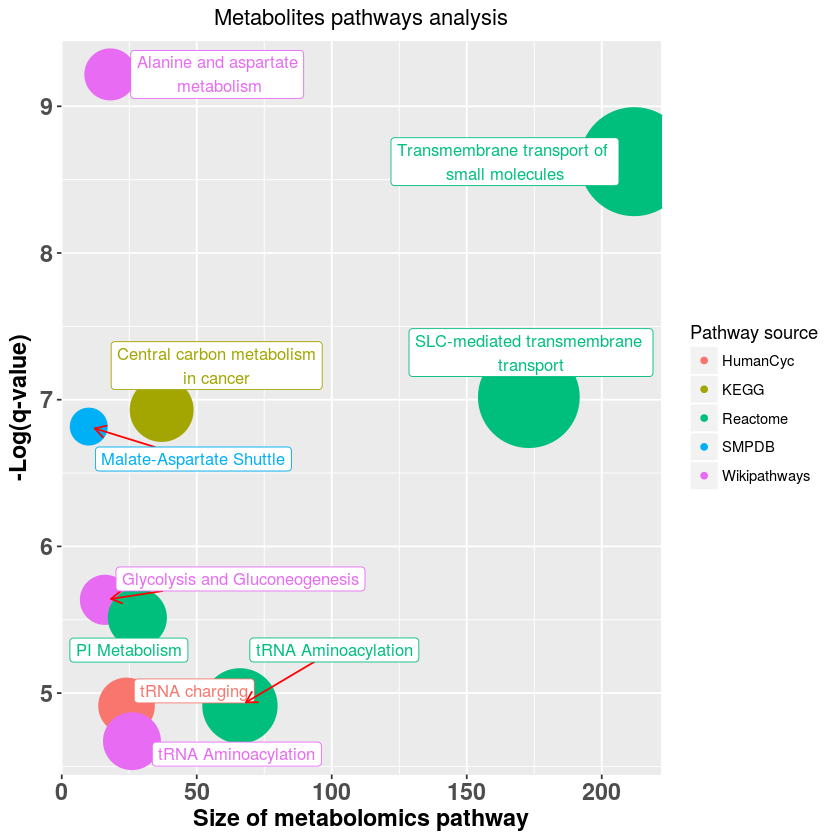

In [113]:
overlapping=read.csv(file="pathway_impla_last_version.csv",check.names = T)
overlapping_filtered <- overlapping
#cbind(overlapping_filtered,overlapping_filtered$Avergae.Overlap..metabolites..percentage/100*5)


zz=str_wrap(overlapping_filtered$pathway.name,width = 50)

#pdf("Ryan_pathway_analysis.pdf",width=15,height=8)

p6 <- ggplot() +
  
  geom_point( data=overlapping_filtered, mapping=aes(x = overlapping_filtered$size,
                                                     y =-log(overlapping_filtered$p.value),
                                                     color=overlapping_filtered$source,
                                                     size=overlapping_filtered$size)) +
  scale_size(range = c(10, 30),guide = 'none')+
  
  labs(x = "Size of metabolomics pathway", y = "-Log(q-value)",color="Pathway source",size="# of overlaped genes") +
  ggtitle("Metabolites pathways analysis")+
  #scale_fill_continuous(low = "orange", high = "orange4")+
  #geom_label(aes(label=overlapping_filtered$pathway_name),color = 'white', size = 3.5)
  #geom_text(data=overlapping_filtered,aes(label=overlapping_filtered$pathway_name),size=3)+
  geom_label_repel(aes(x = overlapping_filtered$size,
                       y =-log(overlapping_filtered$p.value), color=overlapping_filtered$source,
                       label =overlapping_filtered$pathway) ,
                   min.segment.length = unit(2, 'lines'),
                   #nudge_x = ifelse(overlapping_filtered$num_overlapping_metabolites == 11, 2, 0),
                   #nudge_y = ifelse(overlapping_filtered$num_overlapping_metabolites == 5, 0.1, 0)  ,
                   #nudge_y = ifelse(overlapping_filtered$Q.joint== 0.00023, 0.2, 0),
                   size = 3.5,force=1, arrow = arrow(length = unit(0.02, "npc")),segment.color = 'red',
                   box.padding = unit(0.35, "lines"),
                   point.padding = unit(0.5, "lines"),show_guide = F) +
  
  #scale_x_continuous(limits = c(4, 23))+
  #scale_y_continuous(limits = c(1.5, 10))+
  #scale_x_continuous(breaks=c(4:30))+
  #theme(legend.position = "right")+
  theme(plot.title = element_text(hjust = 0.5),axis.text=element_text(size=14,face="bold"),
        axis.title=element_text(size=14,face="bold"))
#geom_text( show.legend  = F )

print(p6)
ggsave(file="bench_query_sort.pdf", width=15,height=8, dpi=300)
#dev.off()

In [99]:
getwd()

[1] "/home/fadl2/Ryan/RAW_DATA_BOTH_BATCHS/RAW_DATA/normlized_two_batchs_togther"

# P-value for all the 203 metabolites using limma

In [31]:
#head(metabolites_230)
dim(metabolites_230)
#head(train)
metabolites_230_with_clinical=cbind(train[,1:7],metabolites_230)
head(metabolites_230_with_clinical)
dim(metabolites_230_with_clinical)


[1]  57 231

X,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,Histidine,isoleucine,Proline,⋯,Ribonolactone,Petroselinic.acid,Methylcysteine,Docosahexaenoic.acid,Arachidic.acid,Erythrose,X1.5.Anhydrosorbitol,D.Threitol,X2.Hydroxypyridine,lable
MT12,3,3,17,18,1,0,-1.3011724,-0.02780630,-0.2696960,⋯,-0.7513749,-0.3502074,-0.5159115,0.002746233,-0.3126881,-0.4105212,-0.53898667,0.3663480,-0.7603450,Normal
MT13,1,3,28,26,4,2,0.1907136,0.45332186,0.5502607,⋯,-0.9587614,-0.3816547,-0.5623591,0.140648299,-0.7786528,-0.7451340,-0.32066163,0.1046196,-0.7603450,Obese
MT15,3,3,30,39,2,1,-1.7239222,-0.02780630,-1.1791738,⋯,-0.1060000,-0.7412140,-2.2879859,0.156911450,-0.4689009,-0.2152600,-0.45383562,-1.5167051,-0.7603450,Normal
MT16,3,3,33,32,4,3,-0.2660199,-1.91438002,-0.6766311,⋯,-0.6932603,0.1448129,-0.5623591,0.327260038,0.3899925,-4.3379166,0.08775887,-1.2506828,-0.9777624,Obese
MT18,3,3,32,34,3,2,-0.9390723,0.08817478,-0.2696960,⋯,-1.0619580,-1.3711803,-0.2308972,-2.994121806,-0.5866939,-0.4378166,-0.40044343,0.1046196,-1.4801240,Obese
MT19,2,2,36,37,2,1,-0.8307209,0.22800589,-0.8741779,⋯,-0.3420400,-1.4460712,-0.3321152,-2.599408650,-0.6534904,-0.1634869,0.12922337,0.2859783,-0.4116233,Normal


[1]  57 238

In [168]:
#Unadjusted p_values

design <- model.matrix(~0+lable,data=metabolites_230)

colnames(design)[1:2]=c("Normal","Obese")
#design
contrast.matrix=makeContrasts(Normal-Obese,levels=design)
#contrast.matrix
# rows corresponding to genes and columns to samples

fit <- lmFit(t(as.matrix(metabolites_230[,-ncol(metabolites_230)])), design)
lmfit.cont <- contrasts.fit(fit, contrast.matrix)
#fit <- lmFit(t(as.matrix(cobre_aa[,12:ncol(cobre_aa)])), design)
fit3  <- eBayes(lmfit.cont)
zz3=data.frame(topTable(fit3,adjust="fdr",number=229))
zz3


,logFC,AveExpr,t,P.Value,adj.P.Val,B
X2.Hydroxy.3.methylbutyric.acid,-0.6608855,-5.263158e-10,-2.502727,0.01233656,0.4721094,-4.269328
Galactonic.acid,-0.6337035,-5.263158e-09,-2.399791,0.01641880,0.4721094,-4.300975
PC.ae.C403,-0.6248517,3.508772e-10,-2.366270,0.01798332,0.4721094,-4.310994
L.Methionine,-0.5761784,-1.754386e-10,-2.181947,0.02913175,0.4721094,-4.363567
Beta.Alanine,-0.5649499,1.754386e-10,-2.139426,0.03242029,0.4721094,-4.375090
Methionine.sulfoxide,-0.5641390,5.263158e-10,-2.136355,0.03266961,0.4721094,-4.375913
C3,-0.5597507,1.754386e-10,-2.119737,0.03404766,0.4721094,-4.380349
PC.aa.C403,-0.5561492,-5.263158e-09,-2.106098,0.03521547,0.4721094,-4.383963
C41,-0.5560118,-5.263157e-11,-2.105578,0.03526069,0.4721094,-4.384100
C142,0.5481929,1.228070e-09,2.075968,0.03791703,0.4721094,-4.391865


In [167]:
#adjsted p_values 
design <- model.matrix(~lable+factor(Mat_Ethnicity)+
                 factor(Pat_Ethnicity)+Paternal_Age+
               +Maternal_Age+factor(Gravidity)+factor(Parity),data=metabolites_230_with_clinical)

# rows corresponding to genes and columns to samples

fit <- lmFit(t(as.matrix(metabolites_230_with_clinical[,8:237])), design)
fit3  <- eBayes(fit)
topTable(fit3,coef=2,adjust="fdr",number=229)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
C161.OH,-0.8550001,-1.754386e-10,-2.490891,0.01276175,0.9260745,-4.393148
C142,-0.7873444,1.228070e-09,-2.293788,0.02182758,0.9260745,-4.430038
PC.aa.C323,-0.7665958,-3.508772e-10,-2.233341,0.02555307,0.9260745,-4.440743
X3.hydroxypyridine,-0.7149709,-1.052632e-10,-2.082941,0.03728722,0.9260745,-4.466136
PC.aa.C403,0.6703276,-5.263158e-09,1.952881,0.05086739,0.9260745,-4.486669
PC.aa.C426,-0.6503398,-3.508772e-10,-1.894650,0.05817364,0.9260745,-4.495433
Oleic.acid,-0.6439901,1.052632e-09,-1.876151,0.06066969,0.9260745,-4.498162
lysoPC.a.C240,-0.6270940,-6.588906e-18,-1.826927,0.06774669,0.9260745,-4.505292
Urea,-0.6224192,-5.263158e-10,-1.813308,0.06982053,0.9260745,-4.507231
lysoPC.a.C281,-0.6046690,3.508772e-11,-1.761596,0.07817450,0.9260745,-4.514463


# Heatmap for lasso metabolites

In [18]:
head(metabolites_lasso)
head(metabolites_230)

PC ae C40:3,2-Hydroxy-3-methylbutyric acid,PC aa C40:3,PC ae C36:2,PC ae C40:6,Oleic acid,isoleucine,C41,L-Arabitol,"1,5-Anhydrosorbitol",⋯,C51-DC,Indoxyl-sulfate,Malic-acid,L-Aspartic acid,Myoinositol,C3,PC ae C34:0,PC aa C36:5,Citric acid,lable
0.05349772,-0.4302330,-0.6434805,0.6510388,0.25655534,0.7739684,-0.02780630,-1.7447970,0.49224325,-0.53898667,⋯,-0.4119751,-3.43505707,0.1261801,-1.8515849,-0.6710888,-1.45057288,-0.01419766,-0.8173285,-0.1303262,Normal
1.47373730,-0.9978383,1.4417915,2.2692627,1.16722991,0.5203891,0.45332186,-0.4946831,-0.43914482,-0.32066163,⋯,1.1465219,-2.49587547,0.3311736,-0.1359379,0.5570171,0.89109075,1.14099252,1.2439001,0.6844715,Obese
-0.77032471,-1.0943611,-0.7314518,-0.3517679,0.03943334,-0.2068387,-0.02780630,0.1032041,-0.85531464,-0.45383562,⋯,0.4641664,-0.17003062,0.4494793,0.3998732,-0.8921536,-0.07215215,-0.95214772,1.6397315,0.6844715,Normal
-0.77032471,0.3278343,-1.1936063,-0.8922831,-0.52095862,-1.3558672,-1.91438002,0.4578568,-0.07590145,0.08775887,⋯,0.9626040,0.18227157,-0.6943037,0.5491654,0.5570171,0.18755072,-1.44362010,-0.6847218,-0.4225555,Obese
0.12852084,-0.8943155,0.1502408,0.3174063,0.03943334,-1.1256036,0.08817478,0.1823098,-0.43914482,-0.40044343,⋯,0.1029355,-3.20485776,-0.3436057,-0.4236931,-0.5294478,0.28085458,-0.12509074,-0.1854042,0.6844715,Obese
-0.25981731,-0.7581060,-0.2248205,0.7702473,0.18073702,-1.2254883,0.22800589,0.2479808,0.16717441,0.12922337,⋯,-1.4698168,0.08604983,0.2367472,-0.5116675,-0.8921536,0.04730251,0.24348426,2.5312915,0.6844715,Normal


Histidine,isoleucine,Proline,Tryptophan,N.Acetyl.l.ornithine,Kynurenine,Methionine.sulfoxide,trans.4.Hydroxy.L.proline,Putrescine,Spermidine,⋯,Ribonolactone,Petroselinic.acid,Methylcysteine,Docosahexaenoic.acid,Arachidic.acid,Erythrose,X1.5.Anhydrosorbitol,D.Threitol,X2.Hydroxypyridine,lable
-1.3011724,-0.02780630,-0.2696960,-0.8181390,-1.0592072,-0.78108465,-0.67973122,-1.39760497,-1.3575029,-0.90979357,⋯,-0.7513749,-0.3502074,-0.5159115,0.002746233,-0.3126881,-0.4105212,-0.53898667,0.3663480,-0.7603450,Normal
0.1907136,0.45332186,0.5502607,0.6764013,-0.1487981,0.22201921,0.29371186,0.49859661,0.6778919,0.55021821,⋯,-0.9587614,-0.3816547,-0.5623591,0.140648299,-0.7786528,-0.7451340,-0.32066163,0.1046196,-0.7603450,Obese
-1.7239222,-0.02780630,-1.1791738,-1.2023542,-0.8597820,-0.59362928,-0.01924588,0.06898471,-0.5698407,-0.02904329,⋯,-0.1060000,-0.7412140,-2.2879859,0.156911450,-0.4689009,-0.2152600,-0.45383562,-1.5167051,-0.7603450,Normal
-0.2660199,-1.91438002,-0.6766311,-0.6006515,-0.1996268,0.04462353,0.23003819,-0.52779471,0.4232686,0.27751604,⋯,-0.6932603,0.1448129,-0.5623591,0.327260038,0.3899925,-4.3379166,0.08775887,-1.2506828,-0.9777624,Obese
-0.9390723,0.08817478,-0.2696960,-0.6006515,-0.9779135,-1.77913097,-0.61139366,-1.14610889,-0.2871581,-0.49570413,⋯,-1.0619580,-1.3711803,-0.2308972,-2.994121806,-0.5866939,-0.4378166,-0.40044343,0.1046196,-1.4801240,Obese
-0.8307209,0.22800589,-0.8741779,-0.2999539,-0.7583837,-0.72155227,-0.06224986,0.06898471,-0.5698407,-0.02904329,⋯,-0.3420400,-1.4460712,-0.3321152,-2.599408650,-0.6534904,-0.1634869,0.12922337,0.2859783,-0.4116233,Normal


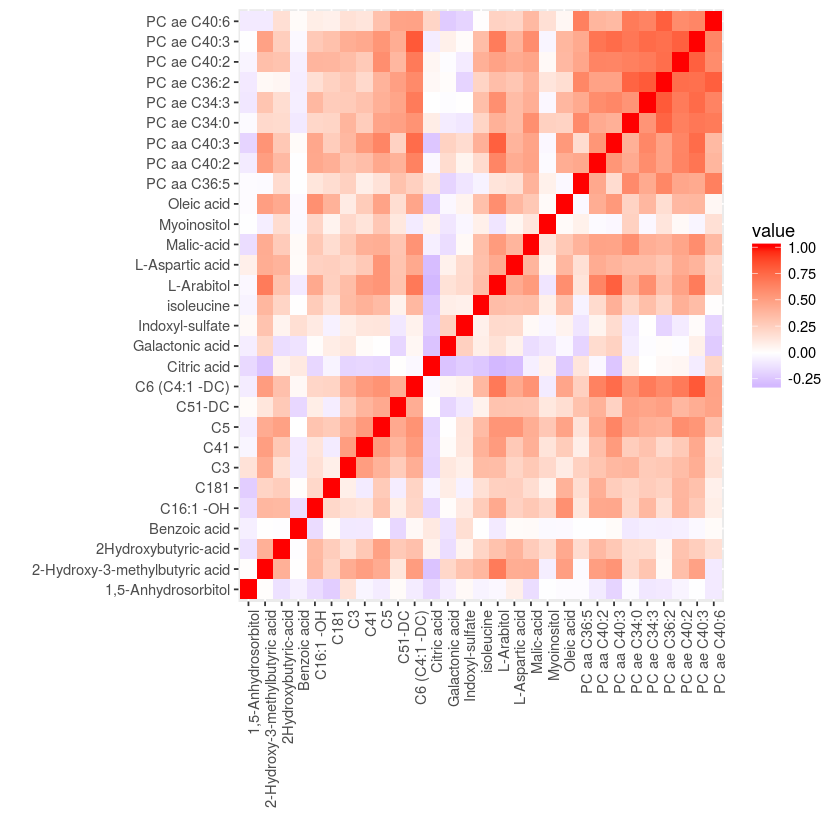

In [69]:
#pdf("correlation_lasso.pdf")
qplot(x=X1, y=X2, data=melt(cor(metabolites_lasso[,-ncol(metabolites_lasso)])), fill=value, geom="tile",ylab = "",xlab="")+
  theme(axis.text.x = element_text(angle =90, hjust = 1))+
  scale_fill_gradient2(low="blue", high="red", guide="colorbar")
#dev.off()

In [44]:
head(metabolites_230)

,Histidine,isoleucine,Proline,Tryptophan,N.Acetyl.l.ornithine,Kynurenine,Methionine.sulfoxide,trans.4.Hydroxy.L.proline,Putrescine,Spermidine,⋯,Ribonolactone,Petroselinic.acid,Methylcysteine,Docosahexaenoic.acid,Arachidic.acid,Erythrose,X1.5.Anhydrosorbitol,D.Threitol,X2.Hydroxypyridine,lable
MT12,-1.3011724,-0.02780630,-0.2696960,-0.8181390,-1.0592072,-0.78108465,-0.67973122,-1.39760497,-1.3575029,-0.90979357,⋯,-0.7513749,-0.3502074,-0.5159115,0.002746233,-0.3126881,-0.4105212,-0.53898667,0.3663480,-0.7603450,Normal
MT13,0.1907136,0.45332186,0.5502607,0.6764013,-0.1487981,0.22201921,0.29371186,0.49859661,0.6778919,0.55021821,⋯,-0.9587614,-0.3816547,-0.5623591,0.140648299,-0.7786528,-0.7451340,-0.32066163,0.1046196,-0.7603450,Obese
MT15,-1.7239222,-0.02780630,-1.1791738,-1.2023542,-0.8597820,-0.59362928,-0.01924588,0.06898471,-0.5698407,-0.02904329,⋯,-0.1060000,-0.7412140,-2.2879859,0.156911450,-0.4689009,-0.2152600,-0.45383562,-1.5167051,-0.7603450,Normal
MT16,-0.2660199,-1.91438002,-0.6766311,-0.6006515,-0.1996268,0.04462353,0.23003819,-0.52779471,0.4232686,0.27751604,⋯,-0.6932603,0.1448129,-0.5623591,0.327260038,0.3899925,-4.3379166,0.08775887,-1.2506828,-0.9777624,Obese
MT18,-0.9390723,0.08817478,-0.2696960,-0.6006515,-0.9779135,-1.77913097,-0.61139366,-1.14610889,-0.2871581,-0.49570413,⋯,-1.0619580,-1.3711803,-0.2308972,-2.994121806,-0.5866939,-0.4378166,-0.40044343,0.1046196,-1.4801240,Obese
MT19,-0.8307209,0.22800589,-0.8741779,-0.2999539,-0.7583837,-0.72155227,-0.06224986,0.06898471,-0.5698407,-0.02904329,⋯,-0.3420400,-1.4460712,-0.3321152,-2.599408650,-0.6534904,-0.1634869,0.12922337,0.2859783,-0.4116233,Normal


In [54]:
annotation=data.frame(Obese_Normal=factor(metabolites_230$lable))
rownames(annotation)=train[,1]
head(annotation)

,Obese_Normal
MT12,Normal
MT13,Obese
MT15,Normal
MT16,Obese
MT18,Obese
MT19,Normal


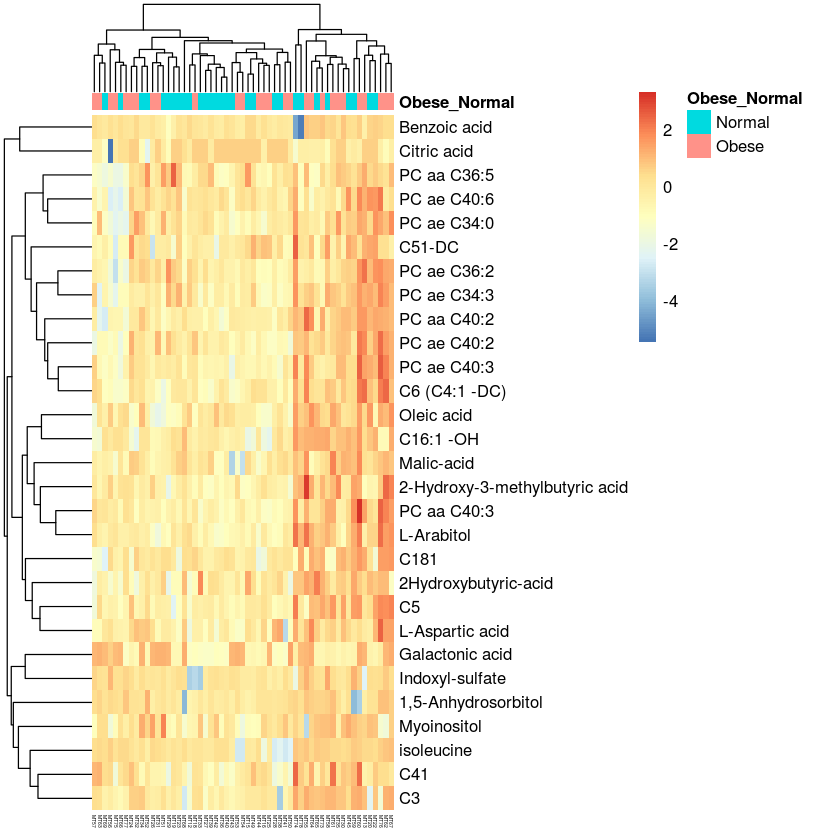

In [71]:
#library(pheatmap)
#rownames(metabolites_lasso)=train[,1]
#pdf("heatmap_lasso.pdf")
pheatmap(t(metabolites_lasso[,-ncol(metabolites_lasso)]),annotation=annotation,fontsize_col=3)
#dev.off()

# Anova of ethnicity and 29 metabolites 

In [2]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:
summary(aov(lm(mpg~.,data=mtcars)))

            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          1  817.7   817.7 116.425 5.03e-10 ***
disp         1   37.6    37.6   5.353  0.03091 *  
hp           1    9.4     9.4   1.334  0.26103    
drat         1   16.5    16.5   2.345  0.14064    
wt           1   77.5    77.5  11.031  0.00324 ** 
qsec         1    3.9     3.9   0.562  0.46166    
vs           1    0.1     0.1   0.018  0.89317    
am           1   14.5    14.5   2.061  0.16586    
gear         1    1.0     1.0   0.138  0.71365    
carb         1    0.4     0.4   0.058  0.81218    
Residuals   21  147.5     7.0                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [16]:
head(lasso_with_clinical_information)
dim(lasso_with_clinical_information)
lasso_with_clinical_information$Mat_Ethnicity <- as.factor(lasso_with_clinical_information$Mat_Ethnicity)
lasso_with_clinical_information$Pat_Ethnicity <- as.factor(lasso_with_clinical_information$Pat_Ethnicity)
lasso_with_clinical_information$Parity<- as.factor(lasso_with_clinical_information$Parity)
lasso_with_clinical_information$Gravidity<- as.factor(lasso_with_clinical_information$Gravidity)


Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,OBS_NORMAL_con,Label,PC.ae.C403,X2.Hydroxy.3.methylbutyric.acid,⋯,C51.DC,Indoxyl.sulfate,Malic.acid,L.Aspartic.acid,Myoinositol,C3,PC.ae.C340,PC.aa.C365,Citric.acid,lable
3,3,17,18,1,0,24.6,Normal,0.05349772,-0.4302330,⋯,-0.4119751,-3.43505707,0.1261801,-1.8515849,-0.6710888,-1.45057288,-0.01419766,-0.8173285,-0.1303262,Normal
1,3,28,26,4,2,38.4,Obese,1.47373730,-0.9978383,⋯,1.1465219,-2.49587547,0.3311736,-0.1359379,0.5570171,0.89109075,1.14099252,1.2439001,0.6844715,Obese
3,3,30,39,2,1,22.0,Normal,-0.77032471,-1.0943611,⋯,0.4641664,-0.17003062,0.4494793,0.3998732,-0.8921536,-0.07215215,-0.95214772,1.6397315,0.6844715,Normal
3,3,33,32,4,3,30.0,Obese,-0.77032471,0.3278343,⋯,0.9626040,0.18227157,-0.6943037,0.5491654,0.5570171,0.18755072,-1.44362010,-0.6847218,-0.4225555,Obese
3,3,32,34,3,2,31.5,Obese,0.12852084,-0.8943155,⋯,0.1029355,-3.20485776,-0.3436057,-0.4236931,-0.5294478,0.28085458,-0.12509074,-0.1854042,0.6844715,Obese
2,2,36,37,2,1,20.5,Normal,-0.25981731,-0.7581060,⋯,-1.4698168,0.08604983,0.2367472,-0.5116675,-0.8921536,0.04730251,0.24348426,2.5312915,0.6844715,Normal


[1] 57 38

In [21]:
class(lasso_with_clinical_information$Mat_Ethnicity)
lasso_with_clinical_information$Mat_Ethnicity=factor(lasso_with_clinical_information$Mat_Ethnicity)
#table(lasso_with_clinical_information$Mat_Ethnicity)
levels(lasso_with_clinical_information$Mat_Ethnicity)=c("Caucasian","Asian","Pacific island")
levels(lasso_with_clinical_information$Mat_Ethnicity)
class(lasso_with_clinical_information$Mat_Ethnicity)
class(lasso_with_clinical_information$Parity)
class(lasso_with_clinical_information$Gravidity)
#lasso_with_clinical_information$Parity=factor(lasso_with_clinical_information$Parity)
lasso_with_clinical_information$Gravidity=factor(lasso_with_clinical_information$Gravidity)

[1] "factor"

[1] "Caucasian"      "Asian"          "Pacific island"

[1] "factor"

[1] "factor"

[1] "factor"

In [40]:
#colnames(lasso_with_clinical_information)[9]
names(lasso_with_clinical_information)[9]

[1] "PC.ae.C403"

In [42]:
i=1

In [22]:
for (i in 1:29){
    print(i)
    print(colnames(lasso_with_clinical_information)[i+8])
print(summary(aov(lm(lasso_with_clinical_information[,(i+8)]~
               Mat_Ethnicity+Parity+Gravidity+Label,data=lasso_with_clinical_information))))
      
}
#summary(aov(lm(X2.Hydroxy.3.methylbutyric.acid~Mat_Ethnicity+Parity+Gravidity+Label,data=lasso_with_clinical_information)))
#summary(aov(lm(X2.Hydroxy.3.methylbutyric.acid~.,data=lasso_with_clinical_information)))

[1] 1
[1] "PC.ae.C403"
              Df Sum Sq Mean Sq F value Pr(>F)  
Mat_Ethnicity  2   4.97  2.4872   2.574 0.0888 .
Parity         5   2.04  0.4076   0.422 0.8308  
Gravidity      8   7.80  0.9756   1.010 0.4444  
Label          1   2.53  2.5266   2.614 0.1138  
Residuals     40  38.66  0.9664                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] 2
[1] "X2.Hydroxy.3.methylbutyric.acid"
              Df Sum Sq Mean Sq F value Pr(>F)  
Mat_Ethnicity  2   7.91   3.955   4.098  0.024 *
Parity         5   3.41   0.682   0.707  0.622  
Gravidity      8   3.58   0.448   0.464  0.874  
Label          1   2.49   2.490   2.580  0.116  
Residuals     40  38.61   0.965                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] 3
[1] "PC.aa.C403"
              Df Sum Sq Mean Sq F value Pr(>F)  
Mat_Ethnicity  2   3.75   1.874   1.995 0.1493  
Parity         5   3.45   0.690   0.734 0.6022  
Gravidity      8   7.10   0.887   0.944 0

In [23]:
for (i in 1:29){
     print(i)
     print(colnames(lasso_with_clinical_information)[i+8])
print(summary((lm(lasso_with_clinical_information[,(i+8)]~
               Mat_Ethnicity,data=lasso_with_clinical_information))))
      
}
#summary((lm(X2.Hydroxy.3.methylbutyric.acid~Mat_Ethnicity,data=lasso_with_clinical_information)))

[1] 1
[1] "PC.ae.C403"

Call:
lm(formula = lasso_with_clinical_information[, (i + 8)] ~ Mat_Ethnicity, 
    data = lasso_with_clinical_information)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7129 -0.6220 -0.1889  0.5700  2.5840 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)
(Intercept)                  0.004746   0.307395   0.015    0.988
Mat_EthnicityAsian          -0.338071   0.368206  -0.918    0.363
Mat_EthnicityPacific island  0.312713   0.365874   0.855    0.396

Residual standard error: 0.9721 on 54 degrees of freedom
Multiple R-squared:  0.08883,	Adjusted R-squared:  0.05508 
F-statistic: 2.632 on 2 and 54 DF,  p-value: 0.08113

[1] 2
[1] "X2.Hydroxy.3.methylbutyric.acid"

Call:
lm(formula = lasso_with_clinical_information[, (i + 8)] ~ Mat_Ethnicity, 
    data = lasso_with_clinical_information)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8858 -0.6930 -0.1316  0.5589  2.6626 

Coefficients:
                            E

# check if there is batch effect 

3.084254,4.383311,7.114156,2.73270843,1.7374836,-1.0981019,-0.04359595,-0.06904768,-1.07710403
6.155900,6.180563,3.686456,0.06155423,-0.6604724,-0.2422438,0.23756387,1.00309040,-0.03957963
5.542908,4.131377,4.864672,-0.72227258,-0.3640493,0.4518452,-1.31537594,-1.30547154,-0.11061296
4.011421,3.565717,3.533005,0.58401496,-1.3125400,2.2860885,-0.48399801,0.01224063,0.49757368
2.978836,7.263536,4.540236,-0.72718802,-0.7047030,-1.2422198,0.71621631,-0.52633999,0.32241258
4.911300,6.220688,5.849485,2.12888742,0.9841765,0.2012989,0.50451787,-0.27153926,-0.20605357
2.580123,7.319707,3.383970,-0.75356899,-1.2617600,1.4278735,-0.34371922,0.08607100,1.26905928
4.720261,4.152153,3.048929,0.92611755,-0.6231086,-1.0595569,1.69271939,0.44320814,0.37739345
5.409734,5.298437,4.196066,2.49689704,0.9464560,-0.4163861,0.43772043,0.52427108,0.73224609
4.358913,4.097398,5.114644,0.37492891,0.5106375,0.3355720,0.72023353,-1.47418660,-0.13405862


[1] 10  9

[1] 9

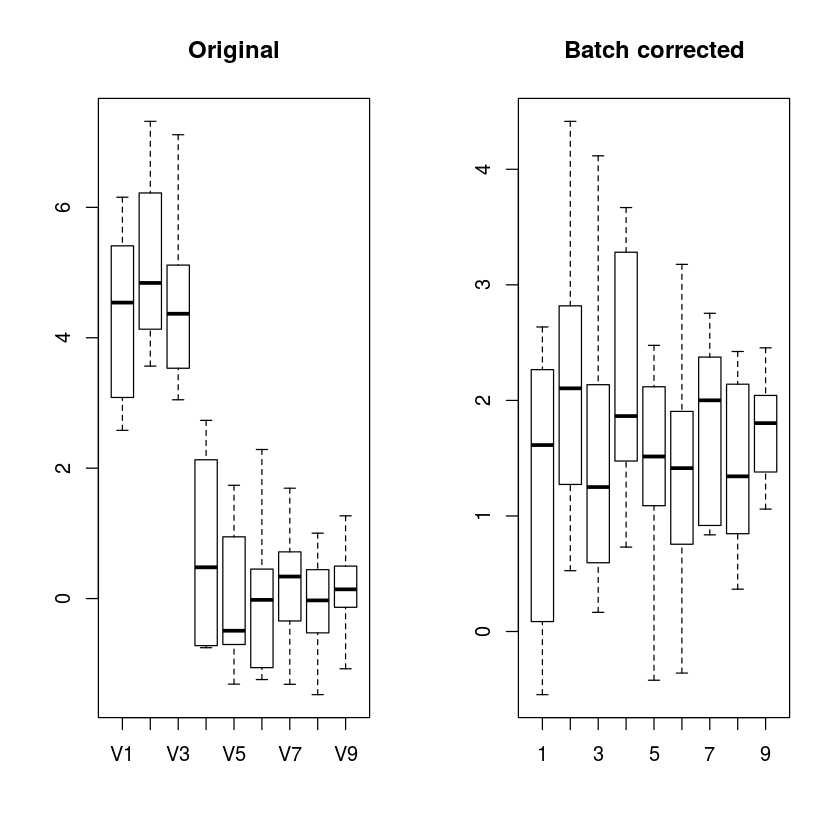

In [39]:
#remove batch effect
#http://web.mit.edu/~r/current/arch/i386_linux26/lib/R/library/limma/html/removeBatchEffect.html
y <- matrix(rnorm(10*9),10,9)
y[,1:3] <- y[,1:3] + 5
batch <- c("A","A","A","B","B","B","C","C","C")
y2 <- removeBatchEffect(y, batch)
par(mfrow=c(1,2))
boxplot(as.data.frame(y),main="Original")
boxplot(as.data.frame(y2),main="Batch corrected")
y
dim(y)
length(batch)

In [7]:
cobre_all_with_chip_col<-read.csv(file="AA -lipids-untarget-normlized_with_chip_col.csv",check.names=F)
head(cobre_all_with_chip_col)

,chip,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,OBS_NORMAL_con,Label,⋯,Benzoic.acid,Ribonolactone,Petroselinic.acid,Methylcysteine,Docosahexaenoic.acid,Arachidic.acid,Erythrose,X1.5.Anhydrosorbitol,D.Threitol,X2.Hydroxypyridine
MT12,1,3,3,17,18,1,0,24.6,Normal,⋯,0.5211878,-0.7513749,-0.3502074,-0.5159115,0.002746233,-0.3126881,-0.4105212,-0.53898667,0.3663480,-0.7603450
MT13,1,1,3,28,26,4,2,38.4,Obese,⋯,-0.3998676,-0.9587614,-0.3816547,-0.5623591,0.140648299,-0.7786528,-0.7451340,-0.32066163,0.1046196,-0.7603450
MT15,1,3,3,30,39,2,1,22.0,Normal,⋯,0.4391095,-0.1060000,-0.7412140,-2.2879859,0.156911450,-0.4689009,-0.2152600,-0.45383562,-1.5167051,-0.7603450
MT16,1,3,3,33,32,4,3,30.0,Obese,⋯,0.2888854,-0.6932603,0.1448129,-0.5623591,0.327260038,0.3899925,-4.3379166,0.08775887,-1.2506828,-0.9777624
MT18,1,3,3,32,34,3,2,31.5,Obese,⋯,0.1292880,-1.0619580,-1.3711803,-0.2308972,-2.994121806,-0.5866939,-0.4378166,-0.40044343,0.1046196,-1.4801240
MT19,1,2,2,36,37,2,1,20.5,Normal,⋯,-0.3821601,-0.3420400,-1.4460712,-0.3321152,-2.599408650,-0.6534904,-0.1634869,0.12922337,0.2859783,-0.4116233


[1] 230  57

[1] 230  57

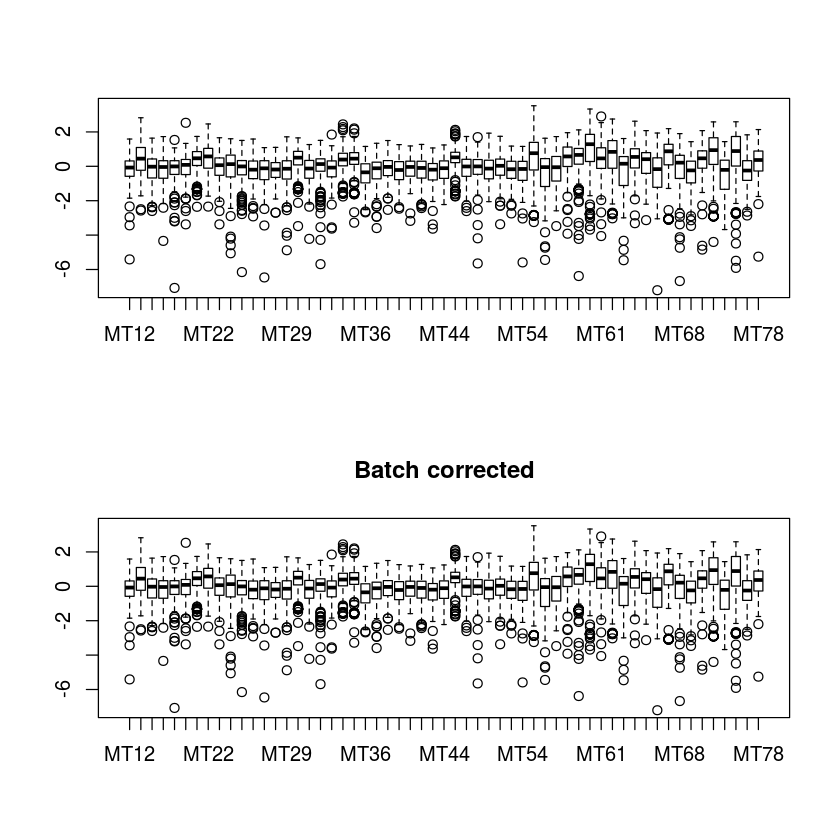

In [58]:
y <- cobre_all_with_chip_col[,11:ncol(cobre_all_with_chip_col)]

batch <- factor(data.matrix(t(cobre_all_with_chip_col["chip"])))

y2 <- removeBatchEffect(data.matrix(t(y), batch))
par(mfrow=c(2,1))
colnames(y2)=cobre_all_with_chip_col[,1]
y=t(y)
colnames(y)=cobre_all_with_chip_col[,1]
boxplot(as.data.frame((y),main="Original"))
boxplot(as.data.frame(y2),main="Batch corrected")
dim((y))
dim(y2)

In [3]:
head(as.data.frame((y)))
head(as.data.frame(y2))

,MT12,MT13,MT15,MT16,MT18,MT19,MT20,MT22,MT23,MT24,⋯,MT66,MT67,MT68,MT69,MT73,MT74,MT75,MT76,MT77,MT78
Histidine,-1.3011724,0.1907136,-1.7239222,-0.26601987,-0.93907230,-0.8307209,0.19071364,-0.0000817,-1.72392215,-1.154703571,⋯,0.3178244,1.8007469,-0.35998551,0.2470793,1.171761,2.0835636,0.4098740,1.8007469,0.4098740,1.1717606
isoleucine,-0.0278063,0.4533219,-0.0278063,-1.91438002,0.08817478,0.2280059,0.45332186,0.3555623,0.01762193,0.182684840,⋯,0.4980775,0.8921602,0.37191668,0.3719167,0.645103,0.8353027,0.2280059,0.6728124,0.5122459,0.6922082
Proline,-0.2696960,0.5502607,-1.1791738,-0.67663115,-0.26969595,-0.8741779,0.03296674,0.4144792,-0.67663115,-0.073409760,⋯,0.7043322,2.0350367,0.03296674,-0.1737851,1.256675,1.9437750,0.2106690,1.5009234,0.2817232,1.1119085
Tryptophan,-0.8181390,0.6764013,-1.2023542,-0.60065151,-0.60065151,-0.2999539,0.42351334,0.5997098,-0.60065151,-0.005018077,⋯,0.3417770,1.9804726,0.17481134,0.1748113,1.171855,1.9433513,-0.4332910,1.6894609,0.5090544,1.1243507
N-Acetyl-l-ornithine,-1.0592072,-0.1487981,-0.8597820,-0.19962680,-0.97791350,-0.7583837,0.62063170,1.1482127,-0.97791350,-0.439757100,⋯,-0.5976386,1.5839074,-0.28505990,-0.1996268,1.291661,1.8608367,-0.5976386,1.8135801,-0.1996268,1.3267322
Kynurenine,-0.7810847,0.2220192,-0.5936293,0.04462353,-1.77913097,-0.7215523,0.14095249,-0.5164904,-1.09624615,-0.155650796,⋯,-0.2410003,1.8329827,-0.15565080,-0.4043964,1.094813,1.9507659,-0.5164904,2.0915656,-0.1001546,1.4393875


,MT12,MT13,MT15,MT16,MT18,MT19,MT20,MT22,MT23,MT24,⋯,MT66,MT67,MT68,MT69,MT73,MT74,MT75,MT76,MT77,MT78
Histidine,-1.3011724,0.1907136,-1.7239222,-0.26601987,-0.93907230,-0.8307209,0.19071364,-0.0000817,-1.72392215,-1.154703571,⋯,0.3178244,1.8007469,-0.35998551,0.2470793,1.171761,2.0835636,0.4098740,1.8007469,0.4098740,1.1717606
isoleucine,-0.0278063,0.4533219,-0.0278063,-1.91438002,0.08817478,0.2280059,0.45332186,0.3555623,0.01762193,0.182684840,⋯,0.4980775,0.8921602,0.37191668,0.3719167,0.645103,0.8353027,0.2280059,0.6728124,0.5122459,0.6922082
Proline,-0.2696960,0.5502607,-1.1791738,-0.67663115,-0.26969595,-0.8741779,0.03296674,0.4144792,-0.67663115,-0.073409760,⋯,0.7043322,2.0350367,0.03296674,-0.1737851,1.256675,1.9437750,0.2106690,1.5009234,0.2817232,1.1119085
Tryptophan,-0.8181390,0.6764013,-1.2023542,-0.60065151,-0.60065151,-0.2999539,0.42351334,0.5997098,-0.60065151,-0.005018077,⋯,0.3417770,1.9804726,0.17481134,0.1748113,1.171855,1.9433513,-0.4332910,1.6894609,0.5090544,1.1243507
N-Acetyl-l-ornithine,-1.0592072,-0.1487981,-0.8597820,-0.19962680,-0.97791350,-0.7583837,0.62063170,1.1482127,-0.97791350,-0.439757100,⋯,-0.5976386,1.5839074,-0.28505990,-0.1996268,1.291661,1.8608367,-0.5976386,1.8135801,-0.1996268,1.3267322
Kynurenine,-0.7810847,0.2220192,-0.5936293,0.04462353,-1.77913097,-0.7215523,0.14095249,-0.5164904,-1.09624615,-0.155650796,⋯,-0.2410003,1.8329827,-0.15565080,-0.4043964,1.094813,1.9507659,-0.5164904,2.0915656,-0.1001546,1.4393875


# if we have obese and non-obese subjects zip code information, so the question is what is the assocation between case-normal and pateins income status

In [347]:
head(train)
dim(train)

X,Mat_Ethnicity,Pat_Ethnicity,Maternal_Age,Paternal_Age,Gravidity,Parity,OBS_NORMAL_con,Label,Histidine,⋯,Benzoic.acid,Ribonolactone,Petroselinic.acid,Methylcysteine,Docosahexaenoic.acid,Arachidic.acid,Erythrose,X1.5.Anhydrosorbitol,D.Threitol,X2.Hydroxypyridine
MT12,3,3,17,18,1,0,24.6,Normal,-1.3011724,⋯,0.5211878,-0.7513749,-0.3502074,-0.5159115,0.002746233,-0.3126881,-0.4105212,-0.53898667,0.3663480,-0.7603450
MT13,1,3,28,26,4,2,38.4,Obese,0.1907136,⋯,-0.3998676,-0.9587614,-0.3816547,-0.5623591,0.140648299,-0.7786528,-0.7451340,-0.32066163,0.1046196,-0.7603450
MT15,3,3,30,39,2,1,22.0,Normal,-1.7239222,⋯,0.4391095,-0.1060000,-0.7412140,-2.2879859,0.156911450,-0.4689009,-0.2152600,-0.45383562,-1.5167051,-0.7603450
MT16,3,3,33,32,4,3,30.0,Obese,-0.2660199,⋯,0.2888854,-0.6932603,0.1448129,-0.5623591,0.327260038,0.3899925,-4.3379166,0.08775887,-1.2506828,-0.9777624
MT18,3,3,32,34,3,2,31.5,Obese,-0.9390723,⋯,0.1292880,-1.0619580,-1.3711803,-0.2308972,-2.994121806,-0.5866939,-0.4378166,-0.40044343,0.1046196,-1.4801240
MT19,2,2,36,37,2,1,20.5,Normal,-0.8307209,⋯,-0.3821601,-0.3420400,-1.4460712,-0.3321152,-2.599408650,-0.6534904,-0.1634869,0.12922337,0.2859783,-0.4116233


[1]  57 239

In [3]:
getwd()

[1] "/home/fadl2/Ryan/RAW_DATA_BOTH_BATCHS/RAW_DATA/normlized_two_batchs_togther"

In [4]:
income_zipcode=read.csv(file='x25-fadhl_zipcode_map/income.txt',sep='\t') 
income_zipcode %>% arrange(-Income.per.Return) %>%head()
#head(income_zipcode)

State,City,Zip_Code,Number.of.Returns,Adjusted.Gross.Income.per.Return,Income.per.Return,Salary.per.Return,Tax.Paid
HAWAII,Honolulu,96802,657,79021,120275,40183,26336
HAWAII,Honolulu,96811,189,19049,100788,47784,21788
HAWAII,Honolulu,96850,24,1900,79167,51364,17286
HAWAII,Honolulu,96821,9450,689784,72993,58506,16699
HAWAII,Honolulu,96844,11,750,68182,56100,9182
HAWAII,Princeville,96722,454,28645,63095,38911,14319


In [52]:
str(income_zipcode)

'data.frame':	137 obs. of  8 variables:
 $ State                           : Factor w/ 1 level "HAWAII": 1 1 1 1 1 1 1 1 1 1 ...
 $ City                            : Factor w/ 95 levels "","Aiea","Anahola",..: 25 25 25 25 25 80 25 25 25 25 ...
 $ Zip_Code                        : int  96802 96811 96850 96821 96844 96722 96825 96806 96810 96803 ...
 $ Number.of.Returns               : int  657 189 24 9450 11 454 13586 86 105 92 ...
 $ Adjusted.Gross.Income.per.Return: int  79021 19049 1900 689784 750 28645 794749 4947 5989 4767 ...
 $ Income.per.Return               : int  120275 100788 79167 72993 68182 63095 58498 57523 57038 51815 ...
 $ Salary.per.Return               : Factor w/ 136 levels "--","13190","13737",..: 122 132 134 136 135 118 133 126 108 121 ...
 $ Tax.Paid                        : Factor w/ 137 levels "--","10085","10354",..: 27 23 18 17 134 15 3 10 12 5 ...


In [39]:
summary(income_zipcode)

    State              City       Zip_Code     Number.of.Returns
 HAWAII:137   Honolulu   :36   Min.   :96701   Min.   :   11    
                         : 3   1st Qu.:96741   1st Qu.:  235    
              Hilo       : 2   Median :96776   Median :  858    
              Kahului    : 2   Mean   :96778   Mean   : 3949    
              Kailua Kona: 2   3rd Qu.:96812   3rd Qu.: 3314    
              Kapolei    : 2   Max.   :96898   Max.   :26300    
              (Other)    :90                                    
 Adjusted.Gross.Income.per.Return Income.per.Return Salary.per.Return
 Min.   :    267                  Min.   :  9526    25659  :  2      
 1st Qu.:   6976                  1st Qu.: 25885    --     :  1      
 Median :  28645                  Median : 32648    13190  :  1      
 Mean   : 149296                  Mean   : 34656    13737  :  1      
 3rd Qu.: 105536                  3rd Qu.: 38533    14512  :  1      
 Max.   :1164964                  Max.   :120275    15014  :

In [41]:
quantile(income_zipcode$Income.per.Return)

0%    25%    50%    75%   100% 
  9526  25885  32648  38533 120275

In [ ]:
https://infogram.com/ways-we-classify-people-1ggk26rdnky42n0
Upper Class ($150k+), Middle Class ($100k-30k+), Working Class ($20k-hourly wages),

In [5]:
zip_code=read.csv(file='x25-fadhl_zipcode_map/i1-table.csv')
head(zip_code)
dim((zip_code))
table(((zip_code$case_control)))

study_id,zip_code,insurance,case_control
MT12,96792,Quest,Normal
MT13,96789,Quest,Obese
MT15,96797,Quest,Normal
MT16,96818,Quest,Obese
MT18,96789,Quest,Obese
MT19,96817,Self-pay,Normal


[1] 57  4


Normal  Obese 
    29     28 

In [53]:
str(zip_code)

'data.frame':	57 obs. of  4 variables:
 $ study_id    : Factor w/ 57 levels "MT12","MT13",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ zip_code    : int  96792 96789 96797 96818 96789 96817 96792 96816 96821 96816 ...
 $ insurance   : Factor w/ 12 levels "HMA","HMAA","HMSA HMO",..: 7 7 7 7 7 8 7 4 4 7 ...
 $ case_control: Factor w/ 2 levels "Normal","Obese": 1 2 1 2 2 1 1 1 1 2 ...


In [6]:
samples_with_zipcode=merge(zip_code,income_zipcode[c('Zip_Code','Income.per.Return')],by.x='zip_code',by.y='Zip_Code') %>% 
arrange(-Income.per.Return) 

In [353]:
summary(samples_with_zipcode)
head(samples_with_zipcode)
tail(samples_with_zipcode)
dim(samples_with_zipcode)

    zip_code        study_id     insurance  case_control Income.per.Return
 Min.   :96701   MT12   : 1   Quest   :24   Normal:28    Min.   :27502    
 1st Qu.:96786   MT13   : 1   HMSA PPO:16   Obese :28    1st Qu.:30148    
 Median :96794   MT15   : 1   HMSA HMO: 3                Median :36148    
 Mean   :96790   MT16   : 1   Self-pay: 3                Mean   :38660    
 3rd Qu.:96816   MT18   : 1   HMAA    : 2                3rd Qu.:46847    
 Max.   :96826   MT19   : 1   Tricare : 2                Max.   :72993    
                 (Other):50   (Other) : 6                                 

zip_code,study_id,insurance,case_control,Income.per.Return
96821,MT23,HMSA PPO,Normal,72993
96821,MT68,Self-pay,Normal,72993
96821,MT29,HMSA PPO,Normal,72993
96825,MT27,HMSA PPO,Normal,58498
96806,MT69,HMSA PPO,Normal,57523
96816,MT22,HMSA PPO,Normal,46948


,zip_code,study_id,insurance,case_control,Income.per.Return
51,96792,MT77,Pacific adminstrator Inc,Obese,27502
52,96792,MT32,Quest,Obese,27502
53,96792,MT78,Quest,Normal,27502
54,96792,MT25,Quest,Obese,27502
55,96792,MT35,Quest,Obese,27502
56,96792,MT41,HMSA HMO,Obese,27502


[1] 56  5

In [71]:
quantile(samples_with_zipcode$Income.per.Return)

0%     25%     50%     75%    100% 
27502.0 30148.5 36148.0 46847.0 72993.0

In [73]:
table(samples_with_zipcode$Income.per.Return)


27502 29925 30223 30922 32580 35161 35196 35740 36556 37489 38533 40757 42495 
    8     6     3     3     1     2     2     3     5     2     3     2     1 
46847 46948 57523 58498 72993 
    4     6     1     1     3 

In [358]:
outersect(train$X,samples_with_zipcode$study_id)

[1] "MT28"  "MT55"  "MT 55" "MT56"  "MT 56"

In [357]:
outersect <- function(x, y) {
  sort(c(setdiff(x, y),
         setdiff(y, x)))
}

In [7]:
sample_with_zipcode_three_level=samples_with_zipcode %>% mutate(e_status = ifelse( Income.per.Return <= 32580 , 'low', 
                                                  ifelse( Income.per.Return >= 46000 , 'high', 'med')))
head(sample_with_zipcode_three_level)
tail(sample_with_zipcode_three_level)
table(sample_with_zipcode_three_level$e_status)
table(sample_with_zipcode_three_level$case_control)

zip_code,study_id,insurance,case_control,Income.per.Return,e_status
96821,MT23,HMSA PPO,Normal,72993,high
96821,MT68,Self-pay,Normal,72993,high
96821,MT29,HMSA PPO,Normal,72993,high
96825,MT27,HMSA PPO,Normal,58498,high
96806,MT69,HMSA PPO,Normal,57523,high
96816,MT22,HMSA PPO,Normal,46948,high


,zip_code,study_id,insurance,case_control,Income.per.Return,e_status
51,96792,MT77,Pacific adminstrator Inc,Obese,27502,low
52,96792,MT32,Quest,Obese,27502,low
53,96792,MT78,Quest,Normal,27502,low
54,96792,MT25,Quest,Obese,27502,low
55,96792,MT35,Quest,Obese,27502,low
56,96792,MT41,HMSA HMO,Obese,27502,low



high  low  med 
  15   21   20 


Normal  Obese 
    28     28 

In [8]:
sample_with_zipcode_three_level=samples_with_zipcode %>% mutate(e_status = ifelse( Income.per.Return <= 40757 , 'low', 'high'))
head(sample_with_zipcode_three_level)
tail(sample_with_zipcode_three_level)
table(sample_with_zipcode_three_level$e_status)
table(sample_with_zipcode_three_level$case_control)

zip_code,study_id,insurance,case_control,Income.per.Return,e_status
96821,MT23,HMSA PPO,Normal,72993,high
96821,MT68,Self-pay,Normal,72993,high
96821,MT29,HMSA PPO,Normal,72993,high
96825,MT27,HMSA PPO,Normal,58498,high
96806,MT69,HMSA PPO,Normal,57523,high
96816,MT22,HMSA PPO,Normal,46948,high


,zip_code,study_id,insurance,case_control,Income.per.Return,e_status
51,96792,MT77,Pacific adminstrator Inc,Obese,27502,low
52,96792,MT32,Quest,Obese,27502,low
53,96792,MT78,Quest,Normal,27502,low
54,96792,MT25,Quest,Obese,27502,low
55,96792,MT35,Quest,Obese,27502,low
56,96792,MT41,HMSA HMO,Obese,27502,low



high  low 
  16   40 


Normal  Obese 
    28     28 

In [9]:
table(sample_with_zipcode_three_level$e_status,sample_with_zipcode_three_level$case_control)

      
       Normal Obese
  high     11     5
  low      17    23

In [10]:
chisq.test(table(sample_with_zipcode_three_level$e_status,sample_with_zipcode_three_level$case_control))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(sample_with_zipcode_three_level$e_status, sample_with_zipcode_three_level$case_control)
X-squared = 2.1875, df = 1, p-value = 0.1391


In [11]:
tbl=table(sample_with_zipcode_three_level$insurance,sample_with_zipcode_three_level$case_control)
tbl

                          
                           Normal Obese
  HMA                           0     0
  HMAA                          1     1
  HMSA HMO                      1     2
  HMSA PPO                     11     5
  Kaiser HMO                    0     1
  Pacific adminstrator Inc      0     1
  Quest                         8    16
  Self-pay                      3     0
  Tricare                       1     1
  UHA                           1     1
  UHA & HMAA                    1     0
  United Health Care            1     0

In [12]:
chisq.test(tbl)

Warning message in chisq.test(tbl):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  tbl
X-squared = NaN, df = 11, p-value = NA


In [47]:
sample_with_zipcode_three_insurance=samples_with_zipcode %>% 
mutate(new_insurance = ifelse( insurance == 'Quest' , 'Quest',  ifelse( insurance == 'HMSA PPO' , 'HMSA PPO', 'mid-range')))
head(sample_with_zipcode_three_insurance)
table(sample_with_zipcode_three_insurance$new_insurance)

zip_code,study_id,insurance,case_control,Income.per.Return,new_insurance
96821,MT23,HMSA PPO,Normal,72993,HMSA PPO
96821,MT68,Self-pay,Normal,72993,mid-range
96821,MT29,HMSA PPO,Normal,72993,HMSA PPO
96825,MT27,HMSA PPO,Normal,58498,HMSA PPO
96806,MT69,HMSA PPO,Normal,57523,HMSA PPO
96816,MT22,HMSA PPO,Normal,46948,HMSA PPO



 HMSA PPO mid-range     Quest 
       16        16        24 

In [48]:
table(sample_with_zipcode_three_insurance$new_insurance,sample_with_zipcode_three_insurance$case_control)

           
            Normal Obese
  HMSA PPO      11     5
  mid-range      9     7
  Quest          8    16

In [19]:
chisq.test(table(sample_with_zipcode_three_insurance$new_insurance,sample_with_zipcode_three_insurance$case_control))


	Pearson's Chi-squared test

data:  table(sample_with_zipcode_three_insurance$new_insurance, sample_with_zipcode_three_insurance$case_control)
X-squared = 5.1667, df = 2, p-value = 0.07552


In [ ]:
ggplot(sample_with_zipcode_three_level_insurance1,aes(x=insurance,y=n,fill = case_control)) +
geom_bar(stat="identity",position = "dodge")+theme(text = element_text(size=10),
        axis.text.x = element_text(angle=90, hjust=1))+theme(legend.title = element_blank())+ylab("Count")+xlab("Insurance company")

In [28]:
Quest_HMSA_PRO=sample_with_zipcode_three_insurance %>% 
filter(new_insurance !='mid-range') %>%
ungroup %>%
mutate(insurance=factor(insurance, levels=unique(insurance), ordered=TRUE))
head(Quest_HMSA_PRO)
table(Quest_HMSA_PRO$insurance)

zip_code,study_id,insurance,case_control,Income.per.Return,new_insurance
96821,MT23,HMSA PPO,Normal,72993,HMSA PPO
96821,MT29,HMSA PPO,Normal,72993,HMSA PPO
96825,MT27,HMSA PPO,Normal,58498,HMSA PPO
96806,MT69,HMSA PPO,Normal,57523,HMSA PPO
96816,MT22,HMSA PPO,Normal,46948,HMSA PPO
96816,MT50,HMSA PPO,Obese,46948,HMSA PPO



HMSA PPO    Quest 
      16       24 

In [29]:
chisq.test(table(Quest_HMSA_PRO$new_insurance,Quest_HMSA_PRO$case_control))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(Quest_HMSA_PRO$new_insurance, Quest_HMSA_PRO$case_control)
X-squared = 3.5129, df = 1, p-value = 0.06089


In [288]:
zz=sample_with_zipcode_three_level %>% filter(insurance == 'Quest' | insurance =='HMSA PPO' ) 
head(zz)

zip_code,study_id,insurance,case_control,Income.per.Return,e_status
96821,MT23,HMSA PPO,Normal,72993,high
96821,MT29,HMSA PPO,Normal,72993,high
96825,MT27,HMSA PPO,Normal,58498,high
96806,MT69,HMSA PPO,Normal,57523,high
96816,MT22,HMSA PPO,Normal,46948,high
96816,MT50,HMSA PPO,Obese,46948,high


In [295]:
levels(zz$insurance)

[1] "HMSA PPO" "Quest"

In [292]:
factor(zz$insurance)

[1] HMSA PPO HMSA PPO HMSA PPO HMSA PPO HMSA PPO HMSA PPO HMSA PPO Quest   
 [9] HMSA PPO Quest    Quest    Quest    HMSA PPO Quest    Quest    Quest   
[17] Quest    HMSA PPO HMSA PPO HMSA PPO HMSA PPO Quest    Quest    HMSA PPO
[25] Quest    Quest    HMSA PPO Quest    Quest    Quest    Quest    HMSA PPO
[33] Quest    Quest    Quest    Quest    Quest    Quest    Quest    Quest   
Levels: HMSA PPO Quest

In [293]:
levels(factor(zz$insurance))

[1] "HMSA PPO" "Quest"

In [289]:
#attach(sample_with_zipcode_three_level)
#zz=sample_with_zipcode_three_level [which ( insurance == 'Quest' |
#                                    insurance =='HMSA PPO') ,] 
#head(zz)

In [294]:
zz$insurance=factor(zz$insurance)

In [296]:
class(levels(zz$insurance))

[1] "character"

In [297]:
table(zz$insurance,zz$case_control)

          
           Normal Obese
  HMSA PPO     11     5
  Quest         8    16

In [298]:
chisq.test(table(zz$insurance,zz$case_control))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(zz$insurance, zz$case_control)
X-squared = 3.5129, df = 1, p-value = 0.06089


In [336]:
#detach("package:plyr", unload=TRUE) 
library(dplyr)

In [388]:
library(forcats)

In [51]:
head(sample_with_zipcode_three_level)

zip_code,study_id,insurance,case_control,Income.per.Return,e_status
96821,MT23,HMSA PPO,Normal,72993,high
96821,MT68,Self-pay,Normal,72993,high
96821,MT29,HMSA PPO,Normal,72993,high
96825,MT27,HMSA PPO,Normal,58498,high
96806,MT69,HMSA PPO,Normal,57523,high
96816,MT22,HMSA PPO,Normal,46948,high


In [53]:
sample_with_zipcode_three_insurance1=samples_with_zipcode %>% 
mutate(new_insurance = ifelse( insurance == 'Quest' , '3',  ifelse( insurance == 'HMSA PPO' , '1', '2'))) %>%
arrange(new_insurance) %>%
ungroup %>%
mutate(new_insurance=factor(new_insurance, levels=unique(new_insurance), ordered=TRUE))
head(sample_with_zipcode_three_insurance1)
table(sample_with_zipcode_three_insurance1$new_insurance)

zip_code,study_id,insurance,case_control,Income.per.Return,new_insurance
96821,MT23,HMSA PPO,Normal,72993,1
96821,MT29,HMSA PPO,Normal,72993,1
96825,MT27,HMSA PPO,Normal,58498,1
96806,MT69,HMSA PPO,Normal,57523,1
96816,MT22,HMSA PPO,Normal,46948,1
96816,MT50,HMSA PPO,Obese,46948,1



 1  2  3 
16 16 24 

In [180]:
sample_with_zipcode_three_level_insurance2=sample_with_zipcode_three_insurance1 %>% 
group_by(insurance,case_control,new_insurance) %>% 
dplyr::summarise(n = n()) %>% 
arrange(new_insurance)%>%
ungroup %>%
mutate(insurance=factor(insurance, levels=unique(insurance), ordered=TRUE))
sample_with_zipcode_three_level_insurance2
write.csv(sample_with_zipcode_three_level_insurance2,"sample_with_zipcode_three_level_insurance2.csv" )

insurance,case_control,new_insurance,n
HMSA PPO,Normal,1,11
HMSA PPO,Obese,1,5
HMAA,Normal,2,1
HMAA,Obese,2,1
HMSA HMO,Normal,2,1
HMSA HMO,Obese,2,2
Kaiser HMO,Obese,2,1
Pacific adminstrator Inc,Obese,2,1
Self-pay,Normal,2,3
Tricare,Normal,2,1


In [184]:
# the corrected format 
sample_with_zipcode_three_level_insurance3=read.csv(file="sample_with_zipcode_three_level_insurance2.csv")
sample_with_zipcode_three_level_insurance3

insurance,case_control,new_insurance,n
HMAA,Normal-weight,2,1
HMAA,Obese,2,1
HMSA HMO,Normal-weight,2,1
HMSA HMO,Obese,2,2
HMSA PPO,Normal-weight,1,11
HMSA PPO,Obese,1,5
Kaiser HMO,Normal-weight,2,0
Kaiser HMO,Obese,2,1
PAI,Normal-weight,2,0
PAI,Obese,2,1


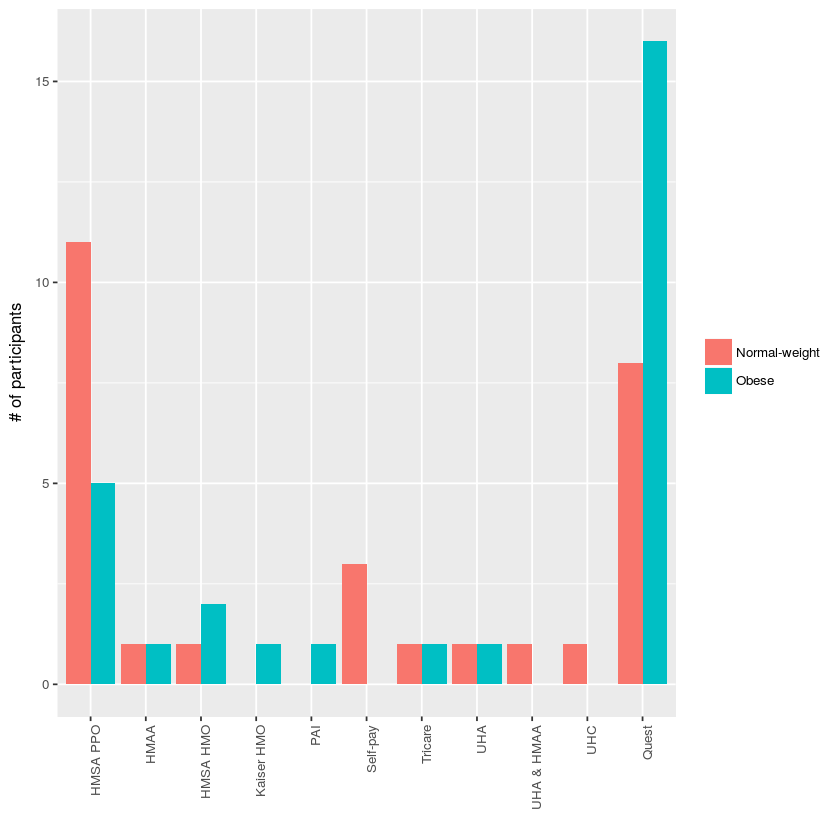

In [191]:
#pdf("insurance_lana.pdf")
ggplot(sample_with_zipcode_three_level_insurance3,aes(x=reorder(insurance,new_insurance),y=n,fill = case_control)) +
geom_bar(stat="identity",position = "dodge")+theme(text = element_text(size=10),
        axis.text.x = element_text(angle=90, hjust=1))+theme(legend.title = element_blank())+ylab("# of participants")+xlab("")
#dev.off()

In [33]:
sample_with_zipcode_three_level_insurance=sample_with_zipcode_three_level %>% 
group_by(insurance,case_control) %>% 
dplyr::summarise(n = n()) %>% 
arrange(-n,-case_control)%>%
ungroup %>%
mutate(insurance=factor(insurance, levels=unique(insurance), ordered=TRUE))
sample_with_zipcode_three_level_insurance 

Warning message in Ops.factor(case_control):
“‘-’ not meaningful for factors”

insurance,case_control,n
Quest,Obese,16
HMSA PPO,Normal,11
Quest,Normal,8
HMSA PPO,Obese,5
Self-pay,Normal,3
HMSA HMO,Obese,2
HMAA,Normal,1
HMAA,Obese,1
HMSA HMO,Normal,1
Kaiser HMO,Obese,1


In [386]:
factor(sample_with_zipcode_three_level_insurance$insurance)

[1] Quest                    HMSA PPO                 Quest                   
 [4] HMSA PPO                 Self-pay                 HMSA HMO                
 [7] HMAA                     HMAA                     HMSA HMO                
[10] Kaiser HMO               Pacific adminstrator Inc Tricare                 
[13] Tricare                  UHA                      UHA                     
[16] UHA & HMAA               United Health Care      
11 Levels: HMAA HMSA HMO HMSA PPO Kaiser HMO Pacific adminstrator Inc ... United Health Care

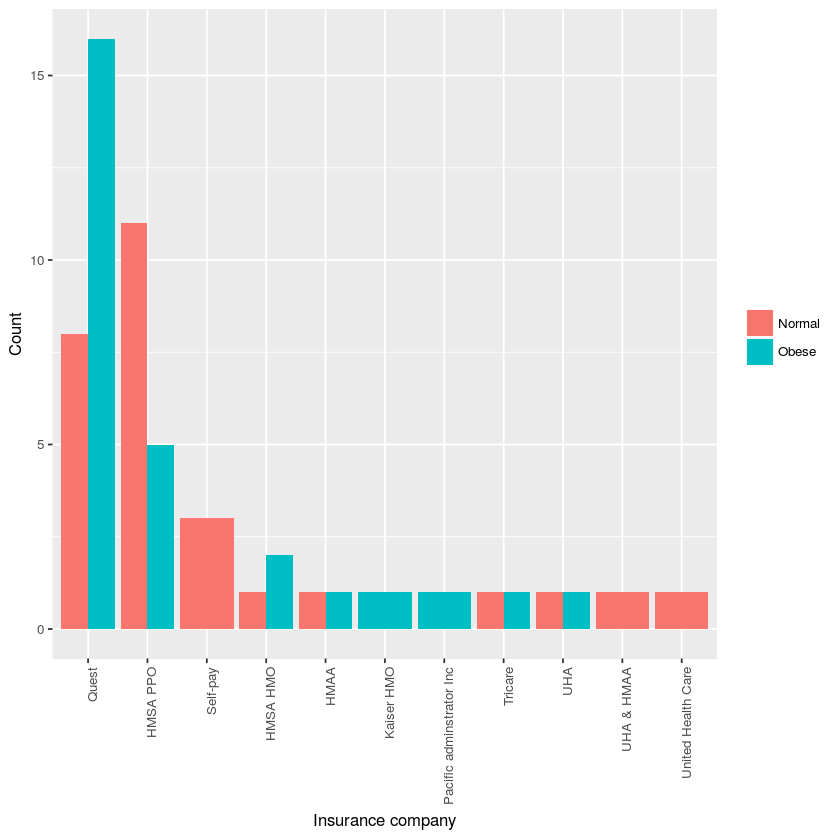

In [42]:
#pdf("insurance.pdf")
ggplot(sample_with_zipcode_three_level_insurance,aes(x=insurance,y=n,fill = case_control)) +
geom_bar(stat="identity",position = "dodge")+theme(text = element_text(size=10),
        axis.text.x = element_text(angle=90, hjust=1))+theme(legend.title = element_blank())+ylab("Count")+xlab("Insurance company")
#dev.off()

In [346]:
class_grouped_by_pos_neg%>%
ggplot(aes(x=(belongs_to),y=pct)) +
geom_bar(stat="identity", fill="red")+theme(text = element_text(size=5),axis.text.x = element_text(angle = 90, hjust = 1))


Normal  Obese 
    28     28 

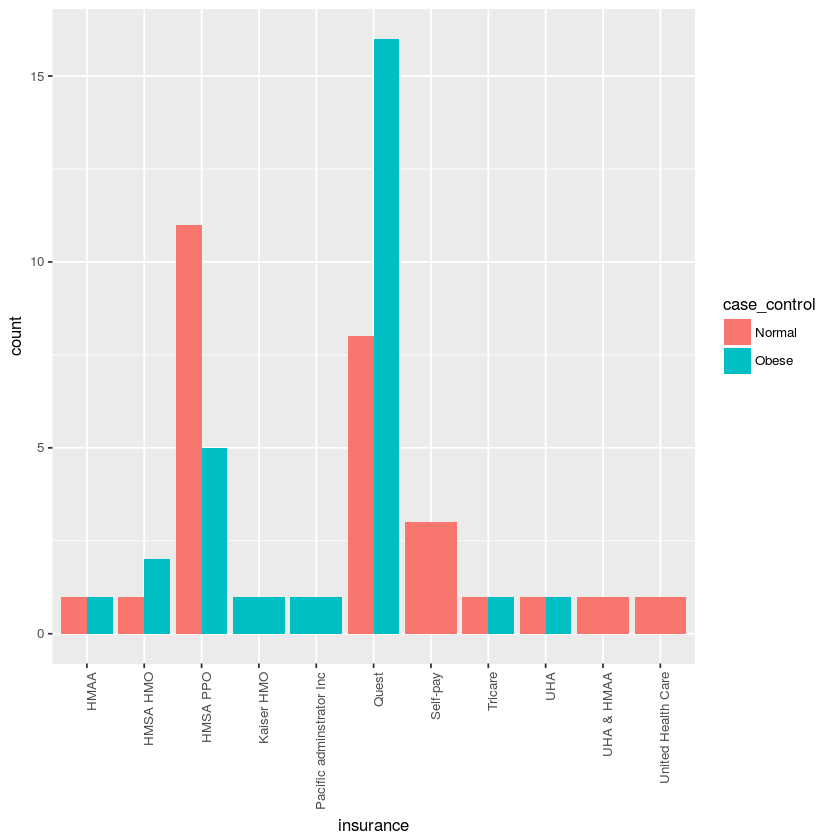

In [308]:
#pdf("insurance.pdf")
ggplot(sample_with_zipcode_three_level, aes(insurance, ..count..)) + geom_bar(aes(fill = case_control), position = "dodge")+
theme(text = element_text(size=10),
        axis.text.x = element_text(angle=90, hjust=1))
#dev.off()

In [204]:
head(sample_with_zipcode_three_level)

zip_code,study_id,insurance,case_control,Income.per.Return,e_status
96821,MT23,HMSA PPO,Normal,72993,high
96821,MT68,Self-pay,Normal,72993,high
96821,MT29,HMSA PPO,Normal,72993,high
96825,MT27,HMSA PPO,Normal,58498,high
96806,MT69,HMSA PPO,Normal,57523,high
96816,MT22,HMSA PPO,Normal,46948,high


In [205]:
#sample_with_zipcode_three_level
t.test(sample_with_zipcode_three_level[sample_with_zipcode_three_level$case_control=='Normal' ,'Income.per.Return'],
      sample_with_zipcode_three_level[sample_with_zipcode_three_level$case_control=='Obese' ,'Income.per.Return'])


	Welch Two Sample t-test

data:  sample_with_zipcode_three_level[sample_with_zipcode_three_level$case_control ==  and sample_with_zipcode_three_level[sample_with_zipcode_three_level$case_control ==     "Normal", "Income.per.Return"] and     "Obese", "Income.per.Return"]
t = 2.0717, df = 39.304, p-value = 0.0449
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
   144.6378 11966.1480
sample estimates:
mean of x mean of y 
 41687.64  35632.25 


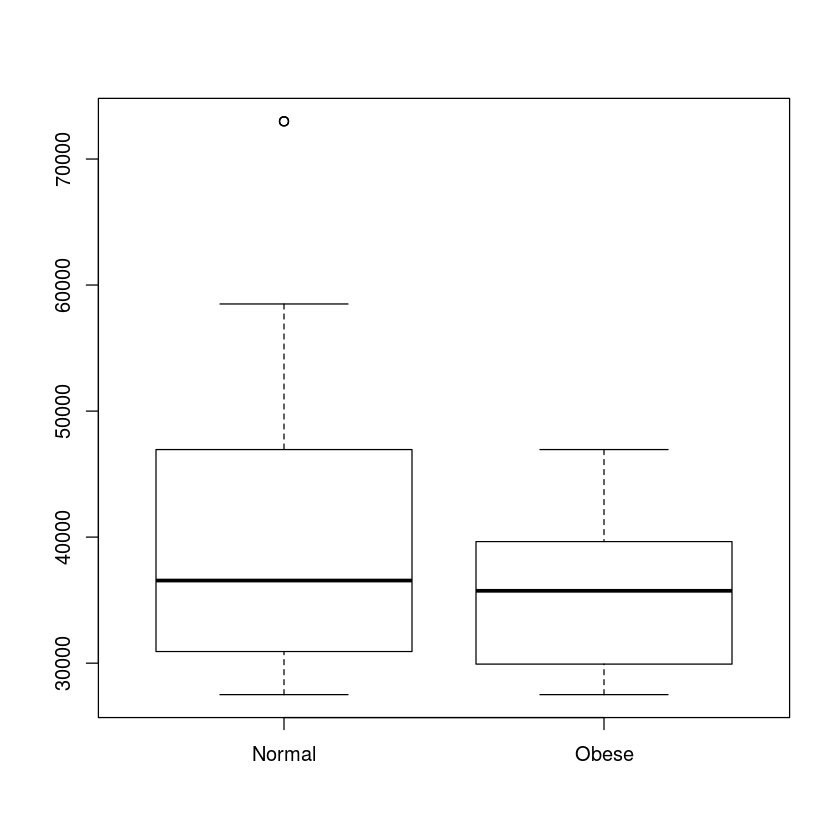

In [203]:
boxplot(sample_with_zipcode_three_level$Income.per.Return~sample_with_zipcode_three_level$case_control, data=sample_with_zipcode_three_level)

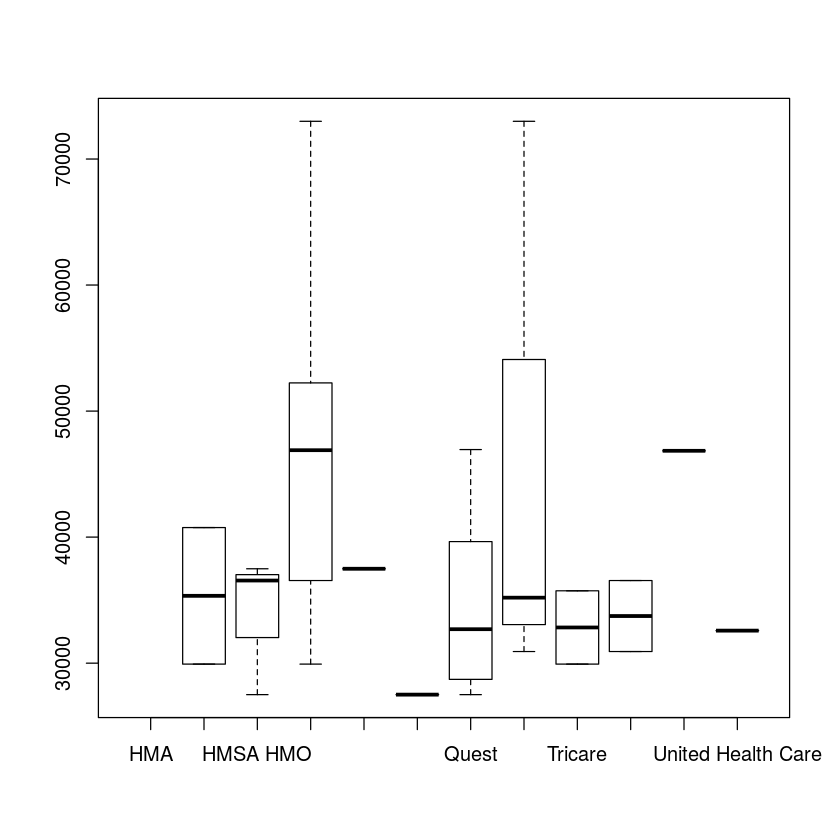

In [276]:
boxplot(sample_with_zipcode_three_level$Income.per.Return~sample_with_zipcode_three_level$insurance, data=sample_with_zipcode_three_level)

In [30]:
ss7=melt(sample_with_zipcode_three_level[,c('case_control','Income.per.Return')])
head(ss7)

Using case_control as id variables


case_control,variable,value
Normal,Income.per.Return,72993
Normal,Income.per.Return,72993
Normal,Income.per.Return,72993
Normal,Income.per.Return,58498
Normal,Income.per.Return,57523
Normal,Income.per.Return,46948


In [175]:
levels(ss7$case_control)=c('Normal-weight','Obese')

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


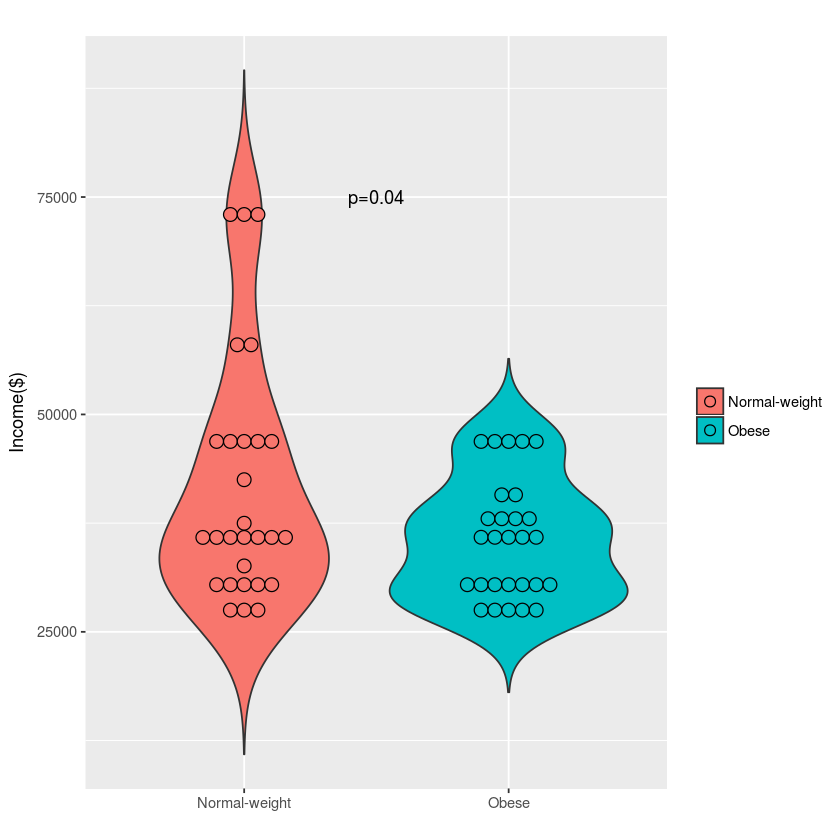

In [193]:
#pdf("income_violin.pdf")
ggplot(ss7, aes(x=case_control, y=value,fill=case_control)) + 
geom_violin(trim=FALSE)+
#p+geom_jitter(shape=16, position=position_jitter(0.2))
geom_dotplot(binaxis='y', stackdir='center',
         position=position_dodge(1),color='black')+labs(title="",x="", y = "Income($)")+
theme(plot.title = element_text(hjust = 0.5))+annotate("text", label = "p=0.04", x = 1.5, y = 75000, color = "black")+
theme(legend.title = element_blank())
#dev.off()